In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import nan
import matplotlib.pyplot as plt

In [2]:
input_file = 'most-recent-cohorts-all-data-elements-1.csv'
column_template = 'column_heading_template.csv'
#there were simply too many wierd columns in the original data set of columns.  I went in and deleted several
#in the master excel file and regenerated the column template.
column_template_2 = 'column_heading_template_new.csv'
path = './data/'
path2 = './data_documentation/'

In [3]:
df = pd.read_csv(path+input_file, low_memory=False)

In [4]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,PrivacySuppressed,PrivacySuppressed,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.loc[1,'UNITID']

100663

In [6]:
len(df)

6806

In [7]:
df.replace(to_replace = 'PrivacySuppressed', value = nan, inplace = True)

In [8]:
df.loc[df['OPEID6'] == 21997, 'MN_EARN_WNE_P8']

23    NaN
Name: MN_EARN_WNE_P8, dtype: object

In [9]:
column_heading_df = pd.read_csv(path2 + column_template_2)

In [10]:
column_heading_df

,dev-category,NAME OF DATA ELEMENT,developer-friendly name,API data type,VARIABLE NAME
0,academics,Average number of months needed to complete la...,program_reporter.program_1.cip_6_digit.avg_mon...,integer,MTHCMP1
1,academics,Average number of months needed to complete pr...,program_reporter.program_2.cip_6_digit.avg_mon...,integer,MTHCMP2
2,academics,Average number of months needed to complete pr...,program_reporter.program_3.cip_6_digit.avg_mon...,integer,MTHCMP3
3,academics,Average number of months needed to complete pr...,program_reporter.program_4.cip_6_digit.avg_mon...,integer,MTHCMP4
4,academics,Average number of months needed to complete pr...,program_reporter.program_5.cip_6_digit.avg_mon...,integer,MTHCMP5
...,...,...,...,...,...
423,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.hispanic_2000,float,UG_HISPOLD
424,student,Total share of enrollment of undergraduate stu...,demographics.non_resident_aliens_2000,float,UG_NRA
425,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.white_2000,float,UG_WHITENH
426,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.unknown_2000,float,UG_UNKN


In [11]:
complete_variable_name_list = df.columns.to_list()
complete_variable_name_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',

In [12]:
filtered_variable_name_list = column_heading_df['VARIABLE NAME'].unique().tolist()
filtered_variable_name_list

['MTHCMP1',
 'MTHCMP2',
 'MTHCMP3',
 'MTHCMP4',
 'MTHCMP5',
 'MTHCMP6',
 'CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'CIPCODE1',
 'CIPCODE2',
 'CIPCODE3',
 'CIPCODE4',
 'CIPCODE5',
 'CIPCODE6',
 'CIPTITLE1',
 'CIPTITLE2',
 'CIPTITLE3',
 'CIPTITLE4',
 'CIPTITLE5',
 'CIPTITLE6',
 'PRGMOFR',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54

In [13]:
df['PCT90_EARN_WNE_P10']

0       70000
1       84000
2       79500
3       93300
4       55400
        ...  
6801      NaN
6802      NaN
6803      NaN
6804      NaN
6805      NaN
Name: PCT90_EARN_WNE_P10, Length: 6806, dtype: object

In [14]:
filtered_df = df.copy()


In [15]:
for variable in complete_variable_name_list:
    if variable not in filtered_variable_name_list:
        filtered_df.drop(columns = variable, inplace = True)

In [16]:
filtered_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,https://www.gmc.edu/index.cms,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,https://www.gmc.edu/index.cms,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,NaN,NaN,0,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,www.hci.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
filtered_df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'INSTURL', 'SCH_DEG', 'MAIN',
       ...
       'CIPTFBSANNUAL5', 'CIPTFBSANNUAL6', 'MTHCMP1', 'MTHCMP2', 'MTHCMP3',
       'MTHCMP4', 'MTHCMP5', 'MTHCMP6', 'FTFTPCTFLOAN_POOLED_SUPP',
       'SCUGFFN_POOLED'],
      dtype='object', length=428)

In [18]:
column_heading_df['dev-category'].unique()

array(['academics', 'admissions', 'aid', 'completion', 'cost', 'earnings',
       'repayment', 'root', 'school', 'student'], dtype=object)

In [19]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.loc[df['INSTNM'] == 'Harvard University', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1492,3,15561.0,50420.0


In [21]:
df.loc[df['INSTNM'] == 'Ohio State University-Main Campus', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
2666,3,NaN,10726.0


In [22]:
df.loc[df['INSTNM'] == 'Dartmouth College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1959,3,31449.0,55453.0


In [23]:
df.loc[df['INSTNM'] == 'Harvey Mudd College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
315,3,32739.0,56620.0


In [24]:
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMENRUP_PARTTIME_POOLED_SUPP', 'FTFTPCTPELL', 'FTFTPCTFLOAN', 'UG12MN',
       'G12MN', 'SCUGFFN', 'POOLYRS_FTFTAIDPCT', 'FTFTPCTPELL_POOLED_SUPP',
       'FTFTPCTFLOAN_POOLED_SUPP', 'SCUGFFN_POOLED'],
      dtype='object', length=1986)

In [25]:
df['PREDDEG']

0       3
1       3
2       3
3       3
4       3
       ..
6801    0
6802    0
6803    0
6804    0
6805    0
Name: PREDDEG, Length: 6806, dtype: int64

In [26]:
df.loc[df['PREDDEG'] == 3, :]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,Transnational Association of Christian College...,championchristiancollege.com,championchristiancollege.com/NetPriceCalculato...,...,NaN,0.0000,0.0000,57.0,NaN,20.0,4.0,NaN,NaN,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,Southern Association of Colleges and Schools C...,elpaso.ttuhsc.edu/,www.depts.ttu.edu/financialaid/netCostCalcHome...,...,NaN,NaN,NaN,370.0,471.0,0.0,4.0,NaN,NaN,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,Higher Learning Commission,https://www.chamberlain.edu/,https://www.chamberlain.edu/admissions/financi...,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,Higher Learning Commission,www.drury.edu/ccps/,tcc.ruffalonl.com/Drury%20University/Freshman-...,...,0.3681,0.7619,0.4048,2857.0,NaN,42.0,2.0,0.7619,0.4048,42.0


In [27]:
cost_df = filtered_df.loc[df['PREDDEG'] == 3, ['INSTNM', 'STABBR','TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PCT10_EARN_WNE_P6', 'PCT25_EARN_WNE_P6', 'PCT75_EARN_WNE_P6', 'PCT90_EARN_WNE_P6', 'MN_EARN_WNE_P6']]

In [28]:
cost_df

,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,Alabama A & M University,AL,9744.0,18354.0,4500,15000,36800,51400,28400
1,University of Alabama at Birmingham,AL,8568.0,19704.0,9700,21000,50800,66200,39400
2,Amridge University,AL,6900.0,6900.0,7300,15200,47200,75400,35400
3,University of Alabama in Huntsville,AL,10714.0,22362.0,9100,22700,56900,70300,40300
4,Alabama State University,AL,11068.0,19396.0,4300,13700,32100,39800,24400
...,...,...,...,...,...,...,...,...,...
6299,Champion Christian College,AR,5240.0,5240.0,NaN,NaN,NaN,NaN,NaN
6314,Texas Tech University Health Sciences Center-E...,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6318,Chamberlain University-Louisiana,LA,19375.0,19375.0,NaN,NaN,NaN,NaN,NaN
6319,Drury University-College of Continuing Profess...,MO,6247.0,6247.0,NaN,NaN,NaN,NaN,NaN


In [29]:
cost_df = cost_df.fillna(0)

In [30]:
cost_df=cost_df.sort_values(by = 'TUITIONFEE_IN', ascending = False).reset_index()

In [31]:
cost_df

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100
2,2368,Vassar College,NY,56960.0,56960.0,9000,22700,49900,61200,39400
3,600,Trinity College,CT,56910.0,56910.0,13500,30600,66800,87100,52000
4,2219,Jewish Theological Seminary of America,NY,56778.0,56778.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2053,229,Sofia University,CA,0.0,0.0,0,0,0,0,0
2054,2347,SUNY Downstate Health Sciences University,NY,0.0,0.0,34900,55100,98700,127700,80400
2055,3560,Bon Secours Memorial College of Nursing,VA,0.0,0.0,26300,36200,63900,71800,50600
2056,309,Golden Gate University-San Francisco,CA,0.0,0.0,14100,43000,94000,127100,72900


In [32]:
cost_df['TUITIONFEE_IN'].astype('int')

0       59430
1       58230
2       56960
3       56910
4       56778
        ...  
2053        0
2054        0
2055        0
2056        0
2057        0
Name: TUITIONFEE_IN, Length: 2058, dtype: int32

In [33]:
cost_df['product'] = (cost_df['TUITIONFEE_IN'].astype('int')* cost_df['TUITIONFEE_OUT'].astype('int')* cost_df['PCT10_EARN_WNE_P6'].astype('int') * cost_df['PCT25_EARN_WNE_P6'].astype('int') * cost_df['PCT75_EARN_WNE_P6'].astype('int') * cost_df['PCT90_EARN_WNE_P6'].astype('int') * cost_df['MN_EARN_WNE_P6'].astype('int')).astype('bool')

In [34]:
cost_df['product']

0        True
1        True
2        True
3        True
4       False
        ...  
2053    False
2054    False
2055    False
2056    False
2057    False
Name: product, Length: 2058, dtype: bool

In [35]:
cost_df = cost_df.loc[cost_df['product'], :]

In [36]:
cost_df

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6,product
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900,True
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100,True
2,2368,Vassar College,NY,56960.0,56960.0,9000,22700,49900,61200,39400,True
3,600,Trinity College,CT,56910.0,56910.0,13500,30600,66800,87100,52000,True
5,315,Harvey Mudd College,CA,56620.0,56620.0,14900,42600,109000,115800,87200,True
...,...,...,...,...,...,...,...,...,...,...,...
1935,2507,Western Carolina University,NC,3926.0,7926.0,8900,20300,41600,50900,33400,True
1940,2467,University of North Carolina at Pembroke,NC,3418.0,7418.0,6800,16700,37500,48900,28900,True
1942,2417,Elizabeth City State University,NC,3194.0,7194.0,4300,14500,33600,41000,25100,True
1945,3163,Oglala Lakota College,SD,2684.0,2684.0,1300,6500,26900,36200,18400,True


In [37]:
cost_df.loc[cost_df['INSTNM'] == 'Ohio State University-Main Campus', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6,product
1382,2666,Ohio State University-Main Campus,OH,10726.0,30742.0,10700,24400,54000,65700,41500,True


In [38]:
cost_df.loc[cost_df['index'] == 2666, :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6,product
1382,2666,Ohio State University-Main Campus,OH,10726.0,30742.0,10700,24400,54000,65700,41500,True


In [39]:
cost_df.loc[cost_df['INSTNM'] == 'Smith College', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6,product
81,1544,Smith College,MA,52404.0,52404.0,8900,18900,48700,63300,37400,True


In [40]:
cost_clean_df = cost_df.copy()

In [41]:
x = cost_clean_df['TUITIONFEE_IN'].to_list()
y1 = cost_clean_df['PCT10_EARN_WNE_P6'].astype(int).to_list()
y2 = cost_clean_df['PCT25_EARN_WNE_P6'].astype(int).to_list()
y3 = cost_clean_df['PCT75_EARN_WNE_P6'].astype(int).to_list()
y4 = cost_clean_df['PCT90_EARN_WNE_P6'].astype(int).to_list()
y5 = cost_clean_df['MN_EARN_WNE_P6'].astype(int).to_list()

In [42]:
x_y_df = cost_clean_df[['TUITIONFEE_IN', 'MN_EARN_WNE_P6']]


In [43]:
x_y_df

,TUITIONFEE_IN,MN_EARN_WNE_P6
0,59430.0,77900
1,58230.0,72100
2,56960.0,39400
3,56910.0,52000
5,56620.0,87200
...,...,...
1935,3926.0,33400
1940,3418.0,28900
1942,3194.0,25100
1945,2684.0,18400


In [44]:
#before doing the line fit let us drop all rows with a 0 in either tuition or earnings
x_y_filtered_df = x_y_df.loc[(x_y_df['TUITIONFEE_IN'] != 0) & (x_y_df['MN_EARN_WNE_P6'] != 0), :]

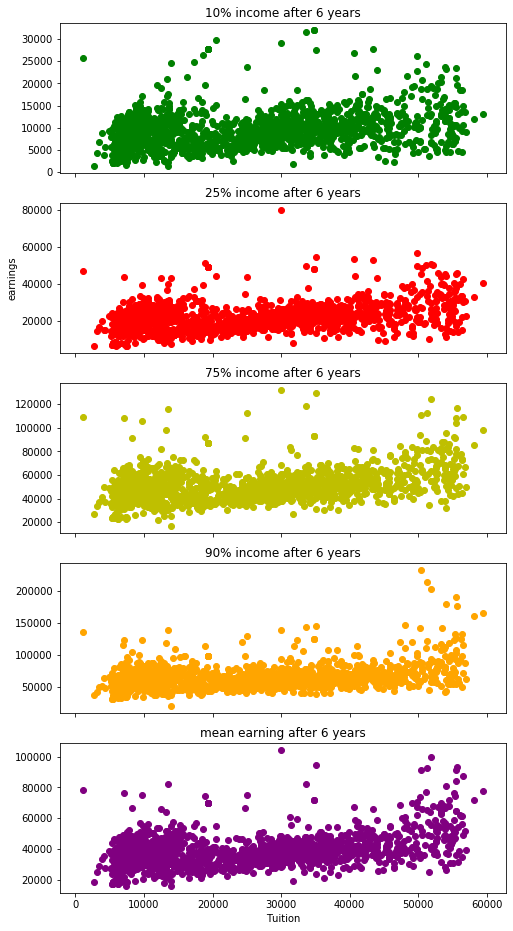

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, sharex = True, figsize=(8,16))
ax1.set_title("10% income after 6 years")
ax2.set_title("25% income after 6 years")
ax3.set_title("75% income after 6 years")
ax4.set_title("90% income after 6 years")
ax5.set_title("mean earning after 6 years")
ax5.set_xlabel("Tuition")
ax2.set_ylabel("earnings")
ax1.scatter(x,y1, color = 'g')

ax2.scatter(x,y2, color = 'r')

ax3.scatter(x,y3, color = 'y')

ax4.scatter(x,y4, color = 'orange')
ax5.scatter(x,y5, color = 'purple')

plt.show()

In [46]:
x_line = np.array(x_y_filtered_df['TUITIONFEE_IN'])

In [47]:
y_line = np.array(x_y_filtered_df['MN_EARN_WNE_P6'])

In [48]:
x_line = x_line.reshape(-1,1)

In [49]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_line, y_line)

In [50]:
fit_r2 = reg.score(x_line, y_line)

In [51]:
reg.coef_

array([0.278746])

In [52]:
reg.intercept_

32143.64304468973

In [53]:
32143+.15*50000

39643.0

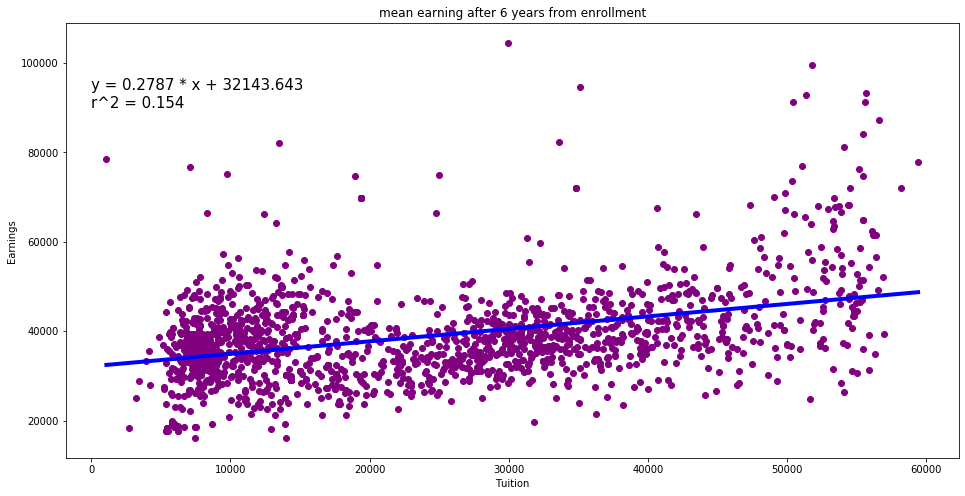

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(figsize=(16,8))

ax1.set_title("mean earning after 6 years from enrollment")
plt.rc('figure', titlesize=30)
plt.rc('axes', titlesize=20)
ax1.scatter(x,y5, color = 'purple')

ax1.text(2, 90000, 'y = %.4f * x + %.3f\nr^2 = %.3f'%(reg.coef_, reg.intercept_, fit_r2) , fontsize=15)
ax1.plot(x, reg.coef_*x + reg.intercept_, color = 'b', linewidth = 4)
ax1.set_xlabel("Tuition")
ax1.set_ylabel("Earnings")
plt.show()
fig.savefig(path2 + 'earnings_tuition.png')

In [55]:
cost_clean_df.loc[cost_clean_df['PCT90_EARN_WNE_P6'].astype(int) > 150000, :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6,product
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900,True
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100,True
15,2413,Duke University,NC,55695.0,55695.0,19700,46000,117100,176900,93200,True
16,2992,University of Pennsylvania,PA,55584.0,55584.0,23500,45400,108000,191500,91200,True
50,621,Georgetown University,DC,54104.0,54104.0,23300,44200,95500,179900,81100,True
90,1508,Massachusetts Institute of Technology,MA,51832.0,51832.0,19400,50800,124100,203700,99600,True
96,3841,Stanford University,CA,51354.0,51354.0,18700,41600,112800,214600,92800,True
104,1492,Harvard University,MA,50420.0,50420.0,18800,45100,111300,233800,91300,True


In [56]:
cost_clean_df.loc[cost_clean_df['INSTNM'] == 'Smith College', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6,product
81,1544,Smith College,MA,52404.0,52404.0,8900,18900,48700,63300,37400,True


In [57]:
cost_clean_df.describe()

,index,TUITIONFEE_IN,TUITIONFEE_OUT
count,1602.00000,1602.000000,1602.000000
mean,2140.97191,23996.546192,27907.703496
std,1213.86090,14734.583764,12320.538559
min,0.00000,1080.000000,1080.000000
25%,1146.25000,10409.000000,18377.000000
50%,2102.50000,21912.000000,26664.000000
75%,3077.75000,34628.750000,35807.500000
max,5577.00000,59430.000000,59430.000000


In [58]:
#PREDEG == 3 is the university is predominately a 4 year school.
filtered_4_year_df = filtered_df.loc[df['PREDDEG'] == 3, :]
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4048,42.0


In [59]:
filtered_4_year_df = filtered_4_year_df.fillna(0)
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4048,42.0


Begin random forest regession.

In [60]:
#try to predict median income.  Must drop all columns relating to income from data set.
#determine all column headings with earnings as the dev-category
column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', :]

,dev-category,NAME OF DATA ELEMENT,developer-friendly name,API data type,VARIABLE NAME
204,earnings,10th percentile of earnings of students workin...,10_yrs_after_entry.working_not_enrolled.earnin...,integer,PCT10_EARN_WNE_P10
205,earnings,10th percentile of earnings of students workin...,6_yrs_after_entry.working_not_enrolled.earning...,integer,PCT10_EARN_WNE_P6
206,earnings,10th percentile of earnings of students workin...,8_yrs_after_entry.10th_percentile_earnings,integer,PCT10_EARN_WNE_P8
207,earnings,25th percentile of earnings of students workin...,10_yrs_after_entry.working_not_enrolled.earnin...,integer,PCT25_EARN_WNE_P10
208,earnings,25th percentile of earnings of students workin...,6_yrs_after_entry.working_not_enrolled.earning...,integer,PCT25_EARN_WNE_P6
...,...,...,...,...,...
274,earnings,Standard deviation of earnings of students wor...,10_yrs_after_entry.working_not_enrolled.std_dev,integer,SD_EARN_WNE_P10
275,earnings,Standard deviation of earnings of students wor...,6_yrs_after_entry.working_not_enrolled.std_dev,integer,SD_EARN_WNE_P6
276,earnings,Standard deviation of earnings of students wor...,7_yrs_after_entry.std_dev,float,SD_EARN_WNE_P7
277,earnings,Standard deviation of earnings of students wor...,8_yrs_after_entry.std_deviation,float,SD_EARN_WNE_P8


In [61]:
#make a list of these variable names
earning_variable_name = column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', 'VARIABLE NAME'].to_list()
earning_variable_name

['PCT10_EARN_WNE_P10',
 'PCT10_EARN_WNE_P6',
 'PCT10_EARN_WNE_P8',
 'PCT25_EARN_WNE_P10',
 'PCT25_EARN_WNE_P6',
 'PCT25_EARN_WNE_P8',
 'PCT75_EARN_WNE_P10',
 'PCT75_EARN_WNE_P6',
 'PCT75_EARN_WNE_P8',
 'PCT90_EARN_WNE_P10',
 'PCT90_EARN_WNE_P6',
 'PCT90_EARN_WNE_P8',
 'MN_EARN_WNE_INDEP0_P10',
 'MN_EARN_WNE_INDEP0_INC1_P10',
 'MN_EARN_WNE_INDEP0_P6',
 'MN_EARN_WNE_INDEP0_INC1_P6',
 'MN_EARN_WNE_MALE0_P10',
 'MN_EARN_WNE_MALE0_P6',
 'MN_EARN_WNE_INDEP1_P10',
 'MN_EARN_WNE_INDEP1_P6',
 'MN_EARN_WNE_MALE1_P10',
 'MN_EARN_WNE_MALE1_P6',
 'MN_EARN_WNE_P10',
 'MN_EARN_WNE_INC3_P10',
 'MN_EARN_WNE_INC1_P10',
 'MN_EARN_WNE_INC2_P10',
 'MN_EARN_WNE_P6',
 'MN_EARN_WNE_INC3_P6',
 'MN_EARN_WNE_INC1_P6',
 'MN_EARN_WNE_INC2_P6',
 'MN_EARN_WNE_P7',
 'MN_EARN_WNE_P8',
 'MN_EARN_WNE_P9',
 'MD_EARN_WNE_P10',
 'MD_EARN_WNE_P6',
 'MD_EARN_WNE_P8',
 'COUNT_WNE_INDEP0_P10',
 'COUNT_WNE_INDEP0_INC1_P10',
 'COUNT_WNE_INDEP0_P6',
 'COUNT_WNE_INDEP0_INC1_P6',
 'COUNT_WNE_MALE0_P10',
 'COUNT_WNE_MALE0_P6',
 'COU

In [62]:
#need to drop all rows that have a 0
row_mean_0 = filtered_4_year_df.loc[filtered_4_year_df['MN_EARN_WNE_P6'] == 0, :].index
row_mean_0

Int64Index([  23,   44,   57,  193,  229,  231,  328,  338,  339,  398,
            ...
            6252, 6254, 6261, 6263, 6271, 6299, 6314, 6318, 6319, 6322],
           dtype='int64', length=232)

In [63]:
filtered_4_year_df = filtered_4_year_df.drop(index = row_mean_0)


In [64]:
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9412,34.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4915,118.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1793,552.0


In [65]:
filtered_4_year_df.to_csv(path2+'filter_4_year_df.csv')

In [66]:
#filter 4 year file based on only main campus
filtered_4_year_main_df = filtered_4_year_df.loc[filtered_4_year_df['MAIN'] == 1, :]

In [67]:
filtered_4_year_main_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,482158,158100,1581,Middle Georgia State University,Macon,GA,31206,https://www.mga.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5295,2317.0
5798,482477,1072700,10727,DeVry University-Illinois,Chicago,IL,60618,https://www.devry.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913,517.0
5809,482680,158500,1585,University of North Georgia,Dahlonega,GA,30597,www.ung.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3079,7300.0
5900,484613,2098800,20988,University of Phoenix-Arizona,Phoenix,AZ,85040,https://www.phoenix.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7745,9022.0


In [68]:
filtered_4_year_main_df.to_csv(path2+'filter_4_year_main_df.csv')

In [69]:
filtered_4_year_column_list = filtered_4_year_df.columns.tolist()
filtered_4_year_column_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'INSTURL',
 'SCH_DEG',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52

In [70]:
#value for y is mean earning 6 years from enrollment
y = filtered_4_year_df['MN_EARN_WNE_P6']
y_baseline = y

In [71]:
from pandas.api.types import is_numeric_dtype

In [72]:
#for X we need to drop all columns that are earnings.  We have kept the one we care about as y.
for variable in earning_variable_name:
    if variable in filtered_4_year_column_list :
        filtered_4_year_df.drop(columns = variable, inplace = True)

In [73]:
y

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: object

In [74]:
#note the fewer columns.  All earnings categories were deleted.
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9412,34.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4915,118.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1793,552.0


In [75]:
#need to drop all text based columns
filtered_4_year_df = filtered_4_year_df.drop(columns = ['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'INSTURL'])

In [76]:
#get list of remaining columns to determine which ones still contain some text
column_list = filtered_4_year_df.columns.to_list()

In [77]:
column_list

['SCH_DEG',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54',
 'CIP01BACHL',
 'CIP03BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP09BA

In [78]:
len(column_list)

345

In [79]:
filtered_4_year_df['VETERAN'].dtypes

dtype('O')

In [80]:
is_numeric_dtype(filtered_4_year_df['VETERAN'])

False

In [81]:
filtered_4_year_df['FEMALE'].dtypes

dtype('O')

In [82]:
for value in filtered_4_year_df['FEMALE']:
    print(value)

0.5640301318
0.6390907397
0.6486486486
0.4763499372
0.6134185304
0.6152524168
0.705078125
0.6929480901
0.531504671
0.520361991
0.7628668652
0.6387315968
0.4704142012
0.5886792453
0
0.5577586207
0.4668079096
0.6732804233
0.6827586207
0.6013931889
0.5860805861
0.6588785047
0.6229367631
0.6452599388
0.4610051993
0.4897540984
0.6510154346
0.6509505703
0.2394366197
0.5987699877
0.5940482875
0.6301369863
0.5568306611
0.5628539071
0.5445544554
0.1816434407
0.743284234
0.6385814497
0.6274509804
0.6956521739
0.2894736842
0.6464909992
0.8375
0.4325068871
0.5588193956
0.5960854093
0.6108749161
0.5661364132
0.6165561287
0.4609929078
0.3921568627
0.5682910089
0.5543415756
0.505952381
0.6155844156
0.4945054945
0.4859550562
0.6232439336
0.4346153846
0.5619419643
0.5636766334
0.5731981982
0.5523465704
0.7258883249
0.6677920324
0.7764705882
0.6606170599
0.6189189189
0.4565217391
0.6172284644
0.5029626253
0.6426605505
0.6771726535
0.6247122956
0.4947096457
0.5745917085
0.6572807723
0.6211972522
0.598007

0.541991342
0.541991342
0.8932714617
0.4532304725
0.64453524
0.5670816044
0.5278106509
0.5147368421
0.5568
0.538573508
0.415625
0.5203439089
0.5203439089
0.634900623
0.4906743185
0.59375
0.5309303458
0.5899014778
0.5100563154
0.5252525253
0.6428571429
0.4060150376
0.936
0.612244898
0.5630550622
0.5639204545
0.5223404255
0.506557377
0.5595056712
0.5595056712
0.5684210526
0.5504444444
0.334519573
0.573257468
0.5496342738
0.6419947507
0.6142122984
0.5875743556
0.4369747899
0.6067961165
0.6183852434
0.6063249727
0.5221606648
0.5573545135
0.4739583333
0.5257599543
0.5714285714
0.6931506849
0.5573545135
0.6058201058
0.6272310046
0.7046979866
0.5771626298
0.5043859649
0.6013289037
0.4942084942
0.7057220708
0.5973931933
0.5617623918
0.6199324324
0.7007738607
0.5191489362
0.6355932203
0.7667161961
0.4947515745
0.8082191781
0.5083557321
0.581754386
0.7326203209
0.6058763931
0.5823633157
0.6276041667
0.5760869565
0.6193480547
0.6840336134
0.624535316
0.5696784074
0.6297624384
0.6258879242
0.52904

In [83]:
i=0
for row in column_list:
    i=i+1
    not_numeric = not is_numeric_dtype(filtered_4_year_df[row])
    if not_numeric:
        print(i, row)

218 WDRAW_ORIG_YR2_RT
219 DEP_COMP_ORIG_YR6_RT
220 RPY_1YR_RT
221 COMPL_RPY_1YR_RT
222 NONCOM_RPY_1YR_RT
223 LO_INC_RPY_1YR_RT
224 MD_INC_RPY_1YR_RT
225 HI_INC_RPY_1YR_RT
226 DEP_RPY_1YR_RT
227 IND_RPY_1YR_RT
228 PELL_RPY_1YR_RT
229 NOPELL_RPY_1YR_RT
230 FEMALE_RPY_1YR_RT
231 MALE_RPY_1YR_RT
232 FIRSTGEN_RPY_1YR_RT
233 NOTFIRSTGEN_RPY_1YR_RT
234 RPY_3YR_RT
235 COMPL_RPY_3YR_RT
236 NONCOM_RPY_3YR_RT
237 LO_INC_RPY_3YR_RT
238 MD_INC_RPY_3YR_RT
239 HI_INC_RPY_3YR_RT
240 DEP_RPY_3YR_RT
241 IND_RPY_3YR_RT
242 PELL_RPY_3YR_RT
243 NOPELL_RPY_3YR_RT
244 FEMALE_RPY_3YR_RT
245 MALE_RPY_3YR_RT
246 FIRSTGEN_RPY_3YR_RT
247 NOTFIRSTGEN_RPY_3YR_RT
248 RPY_5YR_RT
249 COMPL_RPY_5YR_RT
250 NONCOM_RPY_5YR_RT
251 LO_INC_RPY_5YR_RT
252 MD_INC_RPY_5YR_RT
253 HI_INC_RPY_5YR_RT
254 DEP_RPY_5YR_RT
255 IND_RPY_5YR_RT
256 PELL_RPY_5YR_RT
257 NOPELL_RPY_5YR_RT
258 FEMALE_RPY_5YR_RT
259 MALE_RPY_5YR_RT
260 FIRSTGEN_RPY_5YR_RT
261 NOTFIRSTGEN_RPY_5YR_RT
262 RPY_7YR_RT
263 COMPL_RPY_7YR_RT
264 NONCOM_RPY_7YR_RT
265 

In [84]:
filtered_4_year_df.replace(to_replace = 'Dental Hygiene/Hygienist', value = 0, inplace = True)

In [85]:
X = filtered_4_year_df
##########################################################################X_base_line = X

In [86]:
print(X.shape, y.shape)

(1826, 345) (1826,)


In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [88]:
# random forest generator classifier
from sklearn.ensemble import RandomForestRegressor


In [89]:
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7820379658181438

In [90]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([1.32945985e-05, 4.13259137e-06, 5.69903068e-04, 0.00000000e+00,
       9.46390021e-04, 7.45518182e-04, 5.46718820e-04, 6.70848768e-04,
       0.00000000e+00, 1.55298650e-03, 2.06566837e-03, 5.77578367e-03,
       6.05375129e-04, 5.93912874e-04, 3.59284172e-06, 7.21828594e-06,
       2.64004585e-03, 8.07601975e-03, 7.84503632e-04, 7.10039684e-04,
       2.54987485e-03, 1.05800303e-03, 1.64512448e-03, 4.05439312e-04,
       1.14529665e-03, 5.04782377e-03, 7.02718874e-04, 6.77337987e-04,
       5.49471374e-04, 3.25705029e-04, 2.88093273e-04, 4.82162042e-04,
       1.10829340e-03, 7.61126384e-05, 3.13256161e-05, 8.10781867e-04,
       3.90337273e-04, 1.06298354e-03, 5.17823539e-05, 1.06285088e-03,
       3.20595899e-03, 9.00380372e-05, 5.81349901e-04, 1.31188408e-04,
       4.40620542e-04, 9.62290809e-04, 6.15657807e-05, 3.26189080e-03,
       2.31740985e-05, 5.58100100e-03, 7.12883874e-03, 5.77913390e-04,
       1.03794045e-03, 1.85923065e-04, 1.02728803e-04, 4.40524228e-03,
      

In [91]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, column_list), reverse=True)

[(0.14764945048240297, 'RPY_3YR_RT'),
 (0.08799303742483883, 'WDRAW_ORIG_YR2_RT'),
 (0.06407889436222379, 'FAMINC_IND'),
 (0.04428446984842484, 'AVGFACSAL'),
 (0.04302086359218284, 'UGDS_ASIAN'),
 (0.03430983886732977, 'PCIP51'),
 (0.033072590176128534, 'LO_INC_RPY_1YR_RT'),
 (0.02658199597484515, 'RPY_1YR_RT'),
 (0.018493866757724044, 'PCIP50'),
 (0.017442278158217805, 'IND_RPY_3YR_RT'),
 (0.016121250651949866, 'HI_INC_RPY_7YR_RT'),
 (0.01610456327740461, 'IND_RPY_7YR_RT'),
 (0.01518941508020363, 'TUITFTE'),
 (0.01201188054285944, 'INEXPFTE'),
 (0.011671183328666948, 'FIRSTGEN_RPY_7YR_RT'),
 (0.0113158684729329, 'FIRSTGEN_RPY_5YR_RT'),
 (0.01077463821503164, 'MARRIED'),
 (0.01061978450727907, 'DEP_RPY_3YR_RT'),
 (0.010601142874418983, 'AGEGE24'),
 (0.010364411124397734, 'IND_RPY_5YR_RT'),
 (0.009900869864666447, 'FIRSTGEN_RPY_1YR_RT'),
 (0.009638588937631736, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.008294370474350835, 'AGE_ENTRY'),
 (0.008282432490329401, 'UGDS_WHITE'),
 (0.00807601975003108

In [92]:
#OK the repayment success is related to average income.  Makes sense.  If you have money you will repay. All repayment
#columns should be dropped.
repayment_var = column_heading_df.loc[column_heading_df['dev-category'] == 'repayment', 'VARIABLE NAME'].to_list()
repayment_var

['LO_INC_RPY_5YR_RT',
 'MD_INC_RPY_5YR_RT',
 'HI_INC_RPY_5YR_RT',
 'COMPL_RPY_5YR_RT',
 'DEP_RPY_5YR_RT',
 'FEMALE_RPY_5YR_RT',
 'FIRSTGEN_RPY_5YR_RT',
 'IND_RPY_5YR_RT',
 'MALE_RPY_5YR_RT',
 'NONCOM_RPY_5YR_RT',
 'NOTFIRSTGEN_RPY_5YR_RT',
 'NOPELL_RPY_5YR_RT',
 'PELL_RPY_5YR_RT',
 'RPY_5YR_RT',
 'RPY_1YR_RT',
 'RPY_7YR_RT',
 'RPY_3YR_RT',
 'LO_INC_RPY_1YR_RT',
 'MD_INC_RPY_1YR_RT',
 'HI_INC_RPY_1YR_RT',
 'COMPL_RPY_1YR_RT',
 'DEP_RPY_1YR_RT',
 'FEMALE_RPY_1YR_RT',
 'FIRSTGEN_RPY_1YR_RT',
 'IND_RPY_1YR_RT',
 'MALE_RPY_1YR_RT',
 'NONCOM_RPY_1YR_RT',
 'NOTFIRSTGEN_RPY_1YR_RT',
 'NOPELL_RPY_1YR_RT',
 'PELL_RPY_1YR_RT',
 'LO_INC_RPY_7YR_RT',
 'MD_INC_RPY_7YR_RT',
 'HI_INC_RPY_7YR_RT',
 'COMPL_RPY_7YR_RT',
 'DEP_RPY_7YR_RT',
 'FEMALE_RPY_7YR_RT',
 'FIRSTGEN_RPY_7YR_RT',
 'IND_RPY_7YR_RT',
 'MALE_RPY_7YR_RT',
 'NONCOM_RPY_7YR_RT',
 'NOTFIRSTGEN_RPY_7YR_RT',
 'NOPELL_RPY_7YR_RT',
 'PELL_RPY_7YR_RT',
 'LO_INC_RPY_3YR_RT',
 'MD_INC_RPY_3YR_RT',
 'HI_INC_RPY_3YR_RT',
 'COMPL_RPY_3YR_RT',
 'DEP_R

In [93]:
#the a means rev a after the first run of the data.
filtered_4_year_a_df = filtered_4_year_df.copy()
for column_name in repayment_var:
    filtered_4_year_a_df.drop(columns = column_name, inplace = True)

In [94]:
filtered_4_year_a_df

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,3.0,1,1,3,1,1,5,12.0,0.0,34.783368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7287,2698.0
1,3.0,1,1,3,1,1,5,12.0,0.0,33.505697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,4176.0
2,3.0,1,1,3,2,1,5,12.0,0.0,32.362609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24.0
3,3.0,1,1,3,1,1,5,12.0,0.0,34.724557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4402,2544.0
4,3.0,1,1,3,1,1,5,12.0,0.0,32.364317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,3.0,0,19,3,3,51,5,21.0,0.0,37.642570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0
5912,3.0,0,19,3,3,42,2,11.0,0.0,39.952190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9412,34.0
5914,2.0,0,4,3,3,72,9,13.0,0.0,18.199097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4915,118.0
5918,3.0,1,1,3,1,48,6,11.0,0.0,32.659588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1793,552.0


In [95]:
X = filtered_4_year_a_df
X_base_line = X
#********************************************************

In [96]:
#X['IND_RPY_1YR_RT']

In [97]:
column_list_a = filtered_4_year_a_df.columns.to_list()

In [98]:
print(X.shape, y.shape)

(1826, 289) (1826,)


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [100]:
rfa = rf.fit(X_train, y_train)
rfa.score(X_test, y_test)

0.8334003648659147

In [101]:
# Random Forests in sklearn will automatically calculate feature importance
importancesa = rfa.feature_importances_
importancesa

array([6.84500379e-05, 5.07496153e-05, 8.88855276e-04, 0.00000000e+00,
       3.34999857e-04, 1.48088244e-03, 4.71552956e-04, 9.11242971e-04,
       0.00000000e+00, 2.63059702e-03, 4.11467938e-03, 2.91166936e-03,
       1.20778994e-03, 1.52923053e-03, 4.58440287e-07, 4.15117880e-06,
       2.69021686e-03, 6.16361223e-03, 6.69980786e-04, 1.42846741e-03,
       7.07721977e-03, 7.00127586e-04, 3.48716894e-04, 4.17040420e-04,
       1.20776104e-03, 4.63804480e-03, 4.75269901e-04, 4.70615790e-04,
       5.06380813e-04, 8.89795336e-04, 2.18052305e-04, 9.79432215e-04,
       1.07056938e-03, 1.14958196e-04, 1.65612385e-04, 6.55078800e-04,
       2.94665243e-04, 2.19295800e-03, 4.07259821e-05, 6.33742055e-04,
       3.91922052e-03, 8.47640432e-05, 1.09248992e-03, 3.93076842e-04,
       2.51432369e-04, 2.32603408e-03, 1.15527025e-04, 6.32790945e-03,
       1.19640134e-04, 2.83403721e-03, 2.08147826e-02, 7.59424275e-04,
       6.95959863e-04, 2.22514631e-04, 1.24112210e-04, 3.10967208e-03,
      

In [102]:
# We can sort the features by their importance
importance_list_a = sorted(zip(rfa.feature_importances_, column_list_a), reverse=True)
importance_list_a

[(0.24506165989727552, 'WDRAW_ORIG_YR2_RT'),
 (0.09546428959162108, 'FAMINC_IND'),
 (0.0782963915496582, 'AVGFACSAL'),
 (0.06639137661818498, 'UGDS_ASIAN'),
 (0.048176280188687505, 'PCIP51'),
 (0.04383370977387044, 'TUITFTE'),
 (0.03867283417697069, 'INEXPFTE'),
 (0.029210415449935787, 'PCIP50'),
 (0.02081478259909428, 'PCIP14'),
 (0.009203731510230741, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.008966999843741552, 'DEP_COMP_ORIG_YR6_RT'),
 (0.008333807666269403, 'PCIP52'),
 (0.008107567069083724, 'UGDS_WHITE'),
 (0.007899164286242837, 'FEMALE'),
 (0.0077047892798227605, 'INC_PCT_M2'),
 (0.007427469240229294, 'LOAN_EVER'),
 (0.007077219770955677, 'SATMT25'),
 (0.007014758512538782, 'MEDIAN_HH_INC'),
 (0.006582780369722483, 'INC_PCT_H2'),
 (0.0063279094480952055, 'PCIP11'),
 (0.0062522654460406895, 'PCIP42'),
 (0.006163612231134558, 'ADM_RATE_ALL'),
 (0.005747503754129573, 'PCT_BA'),
 (0.00564080223034723, 'DEPENDENT'),
 (0.005541397475950875, 'FAMINC'),
 (0.005413058248937353, 'UGDS_HISP'),
 (0.

In [103]:
a_drop_list = []
for tuple in importance_list_a:
    if tuple[0] < 0.0001:
        a_drop_list.append(tuple[1]) 
    print(tuple)

(0.24506165989727552, 'WDRAW_ORIG_YR2_RT')
(0.09546428959162108, 'FAMINC_IND')
(0.0782963915496582, 'AVGFACSAL')
(0.06639137661818498, 'UGDS_ASIAN')
(0.048176280188687505, 'PCIP51')
(0.04383370977387044, 'TUITFTE')
(0.03867283417697069, 'INEXPFTE')
(0.029210415449935787, 'PCIP50')
(0.02081478259909428, 'PCIP14')
(0.009203731510230741, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.008966999843741552, 'DEP_COMP_ORIG_YR6_RT')
(0.008333807666269403, 'PCIP52')
(0.008107567069083724, 'UGDS_WHITE')
(0.007899164286242837, 'FEMALE')
(0.0077047892798227605, 'INC_PCT_M2')
(0.007427469240229294, 'LOAN_EVER')
(0.007077219770955677, 'SATMT25')
(0.007014758512538782, 'MEDIAN_HH_INC')
(0.006582780369722483, 'INC_PCT_H2')
(0.0063279094480952055, 'PCIP11')
(0.0062522654460406895, 'PCIP42')
(0.006163612231134558, 'ADM_RATE_ALL')
(0.005747503754129573, 'PCT_BA')
(0.00564080223034723, 'DEPENDENT')
(0.005541397475950875, 'FAMINC')
(0.005413058248937353, 'UGDS_HISP')
(0.005373537589213296, 'FIRST_GEN')
(0.00528327326732350

In [104]:
a_drop_list

['CIP31BACHL',
 'NUM4_PUB',
 'PCIP29',
 'CIP49BACHL',
 'PCIP01',
 'NPT4_PUB',
 'CIP19BACHL',
 'NPT4_75UP_PUB',
 'SCH_DEG',
 'CIP22BACHL',
 'CIP26BACHL',
 'CIP05BACHL',
 'MAIN',
 'NPT44_PUB',
 'ACTWRMID',
 'CIP04BACHL',
 'CIP01BACHL',
 'PCIP47',
 'CIPTFBSANNUAL1',
 'PCIP41',
 'CIP10BACHL',
 'CURROPER',
 'CIP12BACHL',
 'WOMENONLY',
 'PCIP48',
 'PRGMOFR',
 'CIP41BACHL',
 'CIP25BACHL',
 'PCIP25',
 'MENONLY',
 'MTHCMP1',
 'CIP48BACHL',
 'CIP47BACHL',
 'PCIP46',
 'CIPCODE1',
 'CIP46BACHL',
 'UG_WHITENH',
 'UG_UNKN',
 'UG_NRA',
 'UG_HISPOLD',
 'UG_BLACKNH',
 'UG_API',
 'UG_AIANOLD',
 'UGDS_WHITENH',
 'UGDS_HISPOLD',
 'UGDS_BLACKNH',
 'UGDS_API',
 'UGDS_AIANOLD',
 'UG',
 'TUITIONFEE_PROG',
 'PREDDEG',
 'PPTUG_EF2',
 'NUM4_PROG',
 'NUM4_OTHER',
 'NUM45_PROG',
 'NUM45_OTHER',
 'NUM44_PROG',
 'NUM44_OTHER',
 'NUM43_PROG',
 'NUM43_OTHER',
 'NUM42_PROG',
 'NUM42_OTHER',
 'NUM41_PROG',
 'NUM41_OTHER',
 'NPT4_PROG',
 'NPT4_OTHER',
 'NPT4_75UP_PROG',
 'NPT4_75UP_OTHER',
 'NPT4_3075_PROG',
 'NPT4_3075_

In [105]:
#the a means rev b after the first run of the data.
filtered_4_year_b_df = filtered_4_year_a_df.copy()
for column_name in a_drop_list:
    filtered_4_year_b_df.drop(columns = column_name, inplace = True)

In [106]:
filtered_4_year_b_df

,NUMBRANCH,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,...,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,SCHTYPE,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,1,1,1,5,12.0,34.783368,-86.568502,18.0,10.0,14.0,...,13,6.8600001335144,94.7399978637695,49720.22,14.8800001144409,4.84000015258789,10.75,1.0,0.7287,2698.0
1,1,1,1,5,12.0,33.505697,-86.799345,15.0,9.0,15.0,...,15.9300003051757,8.55000019073486,96.5,55735.22,10.9099998474121,3.45000004768371,10.8599996566772,1.0,0.5414,4176.0
2,1,2,1,5,12.0,32.362609,-86.174010,20.0,5.0,6.0,...,13.2299995422363,7.01000022888183,94.0899963378906,53683.7,10.6499996185302,3.59999990463256,10.8400001525878,2.0,0,24.0
3,1,1,1,5,12.0,34.724557,-86.640449,16.0,15.0,12.0,...,17.6700000762939,8.90999984741211,95.2699966430664,58688.62,9.36999988555908,3.64000010490417,10.9300003051757,1.0,0.4402,2544.0
4,1,1,1,5,12.0,32.364317,-86.295677,19.0,10.0,14.0,...,11.8100004196167,6.76000022888183,94.5299987792968,46065.2,16.9599990844726,4.80999994277954,10.6700000762939,1.0,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,19,3,51,5,21.0,37.642570,-77.563516,20.0,11.0,6.0,...,0,0,0,0,0,0,0,0.0,0,5.0
5912,19,3,42,2,11.0,39.952190,-75.169354,22.0,11.0,6.0,...,0,0,0,0,0,0,0,3.0,0.9412,34.0
5914,4,3,72,9,13.0,18.199097,-67.146379,26.0,11.0,6.0,...,0,0,0,0,0,0,0,3.0,0.4915,118.0
5918,1,1,48,6,11.0,32.659588,-96.803446,19.0,7.0,9.0,...,0,0,0,0,0,0,0,1.0,0.1793,552.0


In [107]:
X = filtered_4_year_b_df

In [108]:
column_list_b = filtered_4_year_b_df.columns.to_list()

In [109]:
print(X.shape, y.shape)

(1826, 168) (1826,)


In [110]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [111]:
rfb = RandomForestRegressor()
rfb = rf.fit(X_train, y_train)
rfb.score(X_test, y_test)

0.8310112206118112

In [112]:
# We can sort the features by their importance
importance_list_b = sorted(zip(rfb.feature_importances_, column_list_b), reverse=True)
importance_list_b

[(0.2520291149721, 'WDRAW_ORIG_YR2_RT'),
 (0.09483246359317167, 'FAMINC_IND'),
 (0.07683886527321512, 'AVGFACSAL'),
 (0.05965250256155871, 'UGDS_ASIAN'),
 (0.048028494471684696, 'PCIP51'),
 (0.041234782290425674, 'TUITFTE'),
 (0.03647901562941257, 'INEXPFTE'),
 (0.03271901411544681, 'PCIP50'),
 (0.020313151478376583, 'PCIP14'),
 (0.014771418036612282, 'UGDS_WHITE'),
 (0.01150953164089113, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.011181489688699215, 'INC_PCT_M2'),
 (0.008059047425855946, 'FEMALE'),
 (0.00782017775022882, 'PCIP11'),
 (0.007807941174820918, 'DEP_COMP_ORIG_YR6_RT'),
 (0.0073571614035523114, 'INC_PCT_H1'),
 (0.007139694891862631, 'PCIP52'),
 (0.006598743017856462, 'INC_PCT_H2'),
 (0.006561154370481045, 'SATMTMID'),
 (0.0063714414884146675, 'UGDS'),
 (0.005473316491233462, 'AGEGE24'),
 (0.005409484716732122, 'PCT_ASIAN'),
 (0.005300589085992179, 'PCTFLOAN'),
 (0.005263669279028458, 'MARRIED'),
 (0.005209617623803565, 'FAMINC'),
 (0.004997556980628812, 'DEPENDENT'),
 (0.0049516189012

In [113]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
b_drop_list = []
for tuple in importance_list_b:
    if tuple[0] < 0.001:
        b_drop_list.append(tuple[1]) 
    print(tuple)

(0.2520291149721, 'WDRAW_ORIG_YR2_RT')
(0.09483246359317167, 'FAMINC_IND')
(0.07683886527321512, 'AVGFACSAL')
(0.05965250256155871, 'UGDS_ASIAN')
(0.048028494471684696, 'PCIP51')
(0.041234782290425674, 'TUITFTE')
(0.03647901562941257, 'INEXPFTE')
(0.03271901411544681, 'PCIP50')
(0.020313151478376583, 'PCIP14')
(0.014771418036612282, 'UGDS_WHITE')
(0.01150953164089113, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.011181489688699215, 'INC_PCT_M2')
(0.008059047425855946, 'FEMALE')
(0.00782017775022882, 'PCIP11')
(0.007807941174820918, 'DEP_COMP_ORIG_YR6_RT')
(0.0073571614035523114, 'INC_PCT_H1')
(0.007139694891862631, 'PCIP52')
(0.006598743017856462, 'INC_PCT_H2')
(0.006561154370481045, 'SATMTMID')
(0.0063714414884146675, 'UGDS')
(0.005473316491233462, 'AGEGE24')
(0.005409484716732122, 'PCT_ASIAN')
(0.005300589085992179, 'PCTFLOAN')
(0.005263669279028458, 'MARRIED')
(0.005209617623803565, 'FAMINC')
(0.004997556980628812, 'DEPENDENT')
(0.004951618901259103, 'LOAN_EVER')
(0.004847658336440006, 'SATMT25')

In [114]:
#the a means rev c after the first run of the data.
filtered_4_year_c_df = filtered_4_year_b_df.copy()
for column_name in b_drop_list:
    filtered_4_year_c_df.drop(columns = column_name, inplace = True)

In [115]:
X = filtered_4_year_c_df

In [116]:
column_list_c = filtered_4_year_c_df.columns.to_list()

In [117]:
print(X.shape, y.shape)

(1826, 98) (1826,)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [119]:
rfc = rf.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.830878896169811

In [120]:
# We can sort the features by their importance
importance_list_c = sorted(zip(rfc.feature_importances_, column_list_c), reverse=True)
importance_list_c

[(0.24860593883791743, 'WDRAW_ORIG_YR2_RT'),
 (0.09373220699253576, 'FAMINC_IND'),
 (0.07412096077810057, 'UGDS_ASIAN'),
 (0.06966325400017659, 'AVGFACSAL'),
 (0.05568364588593064, 'PCIP51'),
 (0.039510517331857224, 'TUITFTE'),
 (0.03508385558350688, 'INEXPFTE'),
 (0.029697257663617437, 'PCIP50'),
 (0.022896340194957298, 'PCIP14'),
 (0.0119580459629507, 'UGDS_WHITE'),
 (0.010741319019941015, 'INC_PCT_M2'),
 (0.00996962101613573, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.008915472713026285, 'PCIP52'),
 (0.008038140589545687, 'DEP_COMP_ORIG_YR6_RT'),
 (0.007841002098062435, 'PCIP11'),
 (0.0075278531626971346, 'LOAN_EVER'),
 (0.0075265801563356785, 'FEMALE'),
 (0.007387795037759394, 'INC_PCT_H2'),
 (0.006839358891512048, 'PCIP42'),
 (0.006659849528731791, 'SATMT25'),
 (0.00626834705367521, 'UGDS'),
 (0.006239657693039471, 'PCTFLOAN'),
 (0.006052267949286709, 'PCIP26'),
 (0.005976482078330955, 'C150_4'),
 (0.005517359676265471, 'AGE_ENTRY'),
 (0.005507364630924747, 'INC_PCT_H1'),
 (0.00526099941598

In [121]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
c_drop_list = []
for tuple in importance_list_c:
    if tuple[0] < 0.005:
        c_drop_list.append(tuple[1]) 
    print(tuple)

(0.24860593883791743, 'WDRAW_ORIG_YR2_RT')
(0.09373220699253576, 'FAMINC_IND')
(0.07412096077810057, 'UGDS_ASIAN')
(0.06966325400017659, 'AVGFACSAL')
(0.05568364588593064, 'PCIP51')
(0.039510517331857224, 'TUITFTE')
(0.03508385558350688, 'INEXPFTE')
(0.029697257663617437, 'PCIP50')
(0.022896340194957298, 'PCIP14')
(0.0119580459629507, 'UGDS_WHITE')
(0.010741319019941015, 'INC_PCT_M2')
(0.00996962101613573, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.008915472713026285, 'PCIP52')
(0.008038140589545687, 'DEP_COMP_ORIG_YR6_RT')
(0.007841002098062435, 'PCIP11')
(0.0075278531626971346, 'LOAN_EVER')
(0.0075265801563356785, 'FEMALE')
(0.007387795037759394, 'INC_PCT_H2')
(0.006839358891512048, 'PCIP42')
(0.006659849528731791, 'SATMT25')
(0.00626834705367521, 'UGDS')
(0.006239657693039471, 'PCTFLOAN')
(0.006052267949286709, 'PCIP26')
(0.005976482078330955, 'C150_4')
(0.005517359676265471, 'AGE_ENTRY')
(0.005507364630924747, 'INC_PCT_H1')
(0.0052609994159889435, 'UGDS_BLACK')
(0.005187282081724833, 'FIRST_GE

In [122]:
#the a means rev d after the first run of the data.
filtered_4_year_d_df = filtered_4_year_c_df.copy()
for column_name in c_drop_list:
    filtered_4_year_d_df.drop(columns = column_name, inplace = True)

In [123]:
X = filtered_4_year_d_df

In [124]:
column_list_d = filtered_4_year_d_df.columns.to_list()

In [125]:
print(X.shape, y.shape)

(1826, 32) (1826,)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [127]:
rfd = rf.fit(X_train, y_train)
base_prediction  = rfd.score(X_test, y_test)
base_prediction

0.8291456024918917

In [128]:
# We can sort the features by their importance
importance_list_d = sorted(zip(rfd.feature_importances_, column_list_d), reverse=True)
importance_list_d

[(0.25580106789974166, 'WDRAW_ORIG_YR2_RT'),
 (0.10324972302218408, 'FAMINC_IND'),
 (0.08767924267105094, 'AVGFACSAL'),
 (0.07601563645487394, 'UGDS_ASIAN'),
 (0.05375861178516435, 'TUITFTE'),
 (0.050653336160376615, 'PCIP51'),
 (0.04961656804165693, 'INEXPFTE'),
 (0.039478473245073475, 'PCIP50'),
 (0.026508703287653534, 'PCIP14'),
 (0.015634019171271173, 'UGDS_WHITE'),
 (0.014487061238180497, 'INC_PCT_M2'),
 (0.01443255857790804, 'PCIP52'),
 (0.014418311673359685, 'AGE_ENTRY'),
 (0.013789390532179783, 'FEMALE'),
 (0.013234039680006124, 'LONGITUDE'),
 (0.013180015961731163, 'UGDS'),
 (0.012579033368746098, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.012145893410491961, 'INC_PCT_H2'),
 (0.011762799355924598, 'DEP_COMP_ORIG_YR6_RT'),
 (0.010601834083971006, 'PCTFLOAN'),
 (0.010213217204512815, 'FAMINC'),
 (0.009763173813714204, 'PCIP11'),
 (0.009750162241562669, 'SATMTMID'),
 (0.00972648365311606, 'PCIP42'),
 (0.009623512792797544, 'SATMT25'),
 (0.009606694397578781, 'FIRST_GEN'),
 (0.0093082017190

In [129]:
column_heading_df

,dev-category,NAME OF DATA ELEMENT,developer-friendly name,API data type,VARIABLE NAME
0,academics,Average number of months needed to complete la...,program_reporter.program_1.cip_6_digit.avg_mon...,integer,MTHCMP1
1,academics,Average number of months needed to complete pr...,program_reporter.program_2.cip_6_digit.avg_mon...,integer,MTHCMP2
2,academics,Average number of months needed to complete pr...,program_reporter.program_3.cip_6_digit.avg_mon...,integer,MTHCMP3
3,academics,Average number of months needed to complete pr...,program_reporter.program_4.cip_6_digit.avg_mon...,integer,MTHCMP4
4,academics,Average number of months needed to complete pr...,program_reporter.program_5.cip_6_digit.avg_mon...,integer,MTHCMP5
...,...,...,...,...,...
423,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.hispanic_2000,float,UG_HISPOLD
424,student,Total share of enrollment of undergraduate stu...,demographics.non_resident_aliens_2000,float,UG_NRA
425,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.white_2000,float,UG_WHITENH
426,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.unknown_2000,float,UG_UNKN


In [130]:
random_forest_summary_df = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [131]:
variable_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]

In [132]:
for tuple in importance_list_d:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df = random_forest_summary_df.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.25580106789974166
WDRAW_ORIG_YR2_RT
0.10324972302218408
FAMINC_IND
0.08767924267105094
AVGFACSAL
0.07601563645487394
UGDS_ASIAN
0.05375861178516435
TUITFTE
0.050653336160376615
PCIP51
0.04961656804165693
INEXPFTE
0.039478473245073475
PCIP50
0.026508703287653534
PCIP14
0.015634019171271173
UGDS_WHITE
0.014487061238180497
INC_PCT_M2
0.01443255857790804
PCIP52
0.014418311673359685
AGE_ENTRY
0.013789390532179783
FEMALE
0.013234039680006124
LONGITUDE
0.013180015961731163
UGDS
0.012579033368746098
FTFTPCTFLOAN_POOLED_SUPP
0.012145893410491961
INC_PCT_H2
0.011762799355924598
DEP_COMP_ORIG_YR6_RT
0.010601834083971006
PCTFLOAN
0.010213217204512815
FAMINC
0.009763173813714204
PCIP11
0.009750162241562669
SATMTMID
0.00972648365311606
PCIP42
0.009623512792797544
SATMT25
0.009606694397578781
FIRST_GEN
0.009308201719002604
C150_4
0.008976126254740783
PCIP26
0.008794957776383226
LOAN_EVER
0.008788232113968614
UGDS_BLACK
0.008323583097645054
INC_PCT_M1
0.008099335313431974
INC_PCT_H1


In [133]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.255801,title_iv.withdrawn_by.2yrs,126 Percent withdrawn from original institu...,"126 completion Name: dev-category, dtype: o..."
1,FAMINC_IND,0.103250,demographics.avg_family_income_independents,372 Average family income for independent s...,"372 student Name: dev-category, dtype: object"
2,AVGFACSAL,0.087679,faculty_salary,340 Average faculty salary Name: NAME OF DA...,"340 school Name: dev-category, dtype: object"
3,UGDS_ASIAN,0.076016,demographics.race_ethnicity.asian,408 Total share of enrollment of undergradu...,"408 student Name: dev-category, dtype: object"
4,TUITFTE,0.053759,tuition_revenue_per_fte,358 Net tuition revenue per full-time equiv...,"358 school Name: dev-category, dtype: object"
5,PCIP51,0.050653,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
6,INEXPFTE,0.049617,instructional_expenditure_per_fte,355 Instructional expenditures per full-tim...,"355 school Name: dev-category, dtype: object"
7,PCIP50,0.039478,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
8,PCIP14,0.026509,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
9,UGDS_WHITE,0.015634,demographics.race_ethnicity.white,417 Total share of enrollment of undergradu...,"417 student Name: dev-category, dtype: object"


In [134]:
random_forest_summary_df['when_dropped'] = 0
random_forest_summary_df['base_prediction_score'] = base_prediction
random_forest_summary_df['difference'] = 0

In [135]:
filtered_4_year_e_df = filtered_4_year_d_df.copy()
for importance_variable in random_forest_summary_df.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_e_df.drop(columns = importance_variable, inplace = True)
        print('dropping', importance_variable)

dropping FAMINC_IND
dropping AVGFACSAL
dropping INEXPFTE
dropping UGDS_WHITE
dropping INC_PCT_M2
dropping LONGITUDE
dropping UGDS
dropping FTFTPCTFLOAN_POOLED_SUPP
dropping INC_PCT_H2
dropping DEP_COMP_ORIG_YR6_RT
dropping INC_PCT_H1


In [136]:
filtered_4_year_e_df

,SATMT25,SATMTMID,PCIP11,PCIP14,PCIP26,PCIP42,PCIP50,PCIP51,PCIP52,UGDS_BLACK,...,TUITFTE,C150_4,PCTFLOAN,WDRAW_ORIG_YR2_RT,INC_PCT_M1,LOAN_EVER,AGE_ENTRY,FEMALE,FIRST_GEN,FAMINC
0,420.0,465.0,0.0592,0.1183,0.0927,0.0631,0.0237,0.0000,0.1578,0.9120,...,7413.0,0.2685,0.7503,0.300658376006,0.1898932831,0.8860640301,20.283741368,0.5640301318,0.3658280922,32362.826114
1,490.0,555.0,0.0139,0.0813,0.0876,0.0602,0.0339,0.2255,0.1908,0.2553,...,13177.0,0.5829,0.5127,0.189010989011,0.1798024967,0.8574622694,23.60797466,0.6390907397,0.341223671,51306.674306
2,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4615,0.7151,...,14273.0,0.4000,0.8962,0.533333333333,0.1148648649,0.9560810811,33.672297297,0.6486486486,0.5125,21079.472973
3,450.0,565.0,0.0590,0.2892,0.0436,0.0202,0.0380,0.1543,0.2108,0.0969,...,8677.0,0.5187,0.4192,0.177021276596,0.1377145249,0.8652155714,22.727919632,0.4763499372,0.3101321586,61096.588949
4,420.0,465.0,0.0585,0.0000,0.0831,0.0600,0.0585,0.1677,0.1062,0.9352,...,10160.0,0.3001,0.7845,0.33203125,0.178514377,0.8889776358,20.130990415,0.6134185304,0.3434343434,31684.382188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,0.0,0.0,0.0941,0.0000,0.0000,0.0000,0.0000,0.0471,0.6000,0.3467,...,9888.0,0.1746,0.2199,0.489800804444,0.16314643,0.8428559903,32.048956014,0.6972811618,0.5435338797,25959.118161
5912,0.0,0.0,0.0364,0.0000,0.0000,0.0000,0.0000,0.3455,0.2000,0.4918,...,7952.0,0.1358,0.4823,0.489800804444,0.16314643,0.8428559903,32.048956014,0.6972811618,0.5435338797,25959.118161
5914,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,4583.0,0.4545,0.0566,0.245901639344,0.0603598375,0.2698781196,24.857806152,0.6796285548,0.6864295125,7753.1671503
5918,460.0,495.0,0.0070,0.0000,0.0070,0.1235,0.0000,0.0139,0.2661,0.3036,...,7012.0,0.3041,0.4329,0,0.2408127972,0.6567228707,28.955036749,0.7336792045,0.5781339439,30498.626027


In [137]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category,when_dropped,base_prediction_score,difference
0,WDRAW_ORIG_YR2_RT,0.255801,title_iv.withdrawn_by.2yrs,126 Percent withdrawn from original institu...,"126 completion Name: dev-category, dtype: o...",0.817317,0.829146,0.011829
1,FAMINC_IND,0.103250,demographics.avg_family_income_independents,372 Average family income for independent s...,"372 student Name: dev-category, dtype: object",0.831420,0.829146,-0.002274
2,AVGFACSAL,0.087679,faculty_salary,340 Average faculty salary Name: NAME OF DA...,"340 school Name: dev-category, dtype: object",0.834318,0.829146,-0.005172
3,UGDS_ASIAN,0.076016,demographics.race_ethnicity.asian,408 Total share of enrollment of undergradu...,"408 student Name: dev-category, dtype: object",0.828722,0.829146,0.000423
4,TUITFTE,0.053759,tuition_revenue_per_fte,358 Net tuition revenue per full-time equiv...,"358 school Name: dev-category, dtype: object",0.827888,0.829146,0.001257
5,PCIP51,0.050653,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object",0.815018,0.829146,0.014128
6,INEXPFTE,0.049617,instructional_expenditure_per_fte,355 Instructional expenditures per full-tim...,"355 school Name: dev-category, dtype: object",0.832805,0.829146,-0.003659
7,PCIP50,0.039478,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object",0.824502,0.829146,0.004644
8,PCIP14,0.026509,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object",0.800729,0.829146,0.028417
9,UGDS_WHITE,0.015634,demographics.race_ethnicity.white,417 Total share of enrollment of undergradu...,"417 student Name: dev-category, dtype: object",0.836647,0.829146,-0.007501


In [138]:
column_list_e = filtered_4_year_e_df.columns.to_list()


In [139]:
column_list_e

['SATMT25',
 'SATMTMID',
 'PCIP11',
 'PCIP14',
 'PCIP26',
 'PCIP42',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'UGDS_BLACK',
 'UGDS_ASIAN',
 'TUITFTE',
 'C150_4',
 'PCTFLOAN',
 'WDRAW_ORIG_YR2_RT',
 'INC_PCT_M1',
 'LOAN_EVER',
 'AGE_ENTRY',
 'FEMALE',
 'FIRST_GEN',
 'FAMINC']

In [140]:
X = filtered_4_year_e_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfe = rf.fit(X_train, y_train)
new_base_prediction  = rfe.score(X_test, y_test)
new_base_prediction

0.8303595101329362

In [141]:
# We can sort the features by their importance
importance_list_e = sorted(zip(rfe.feature_importances_, column_list_e), reverse=True)
importance_list_e

[(0.28126005120402703, 'WDRAW_ORIG_YR2_RT'),
 (0.14474918982311574, 'UGDS_ASIAN'),
 (0.0686432015490815, 'TUITFTE'),
 (0.06411067803790224, 'PCIP51'),
 (0.05743445894263052, 'PCIP50'),
 (0.0430481557497869, 'PCIP14'),
 (0.04161805361627368, 'FAMINC'),
 (0.04136516698084309, 'AGE_ENTRY'),
 (0.029938987678616857, 'PCIP52'),
 (0.028000932448287455, 'SATMT25'),
 (0.02440217238544348, 'LOAN_EVER'),
 (0.021786938211492506, 'C150_4'),
 (0.02102793952171147, 'INC_PCT_M1'),
 (0.020698880423946506, 'UGDS_BLACK'),
 (0.01763035317448031, 'PCTFLOAN'),
 (0.01749734203804499, 'PCIP42'),
 (0.017282269412724066, 'SATMTMID'),
 (0.01650870199168281, 'FIRST_GEN'),
 (0.015884838953363192, 'FEMALE'),
 (0.014515846097732609, 'PCIP11'),
 (0.012595841758813191, 'PCIP26')]

In [142]:
random_forest_summary_df_2 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [143]:
for tuple in importance_list_e:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_2 = random_forest_summary_df_2.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.28126005120402703
WDRAW_ORIG_YR2_RT
0.14474918982311574
UGDS_ASIAN
0.0686432015490815
TUITFTE
0.06411067803790224
PCIP51
0.05743445894263052
PCIP50
0.0430481557497869
PCIP14
0.04161805361627368
FAMINC
0.04136516698084309
AGE_ENTRY
0.029938987678616857
PCIP52
0.028000932448287455
SATMT25
0.02440217238544348
LOAN_EVER
0.021786938211492506
C150_4
0.02102793952171147
INC_PCT_M1
0.020698880423946506
UGDS_BLACK
0.01763035317448031
PCTFLOAN
0.01749734203804499
PCIP42
0.017282269412724066
SATMTMID
0.01650870199168281
FIRST_GEN
0.015884838953363192
FEMALE
0.014515846097732609
PCIP11
0.012595841758813191
PCIP26


In [144]:
random_forest_summary_df_2

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.281260,title_iv.withdrawn_by.2yrs,126 Percent withdrawn from original institu...,"126 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.144749,demographics.race_ethnicity.asian,408 Total share of enrollment of undergradu...,"408 student Name: dev-category, dtype: object"
2,TUITFTE,0.068643,tuition_revenue_per_fte,358 Net tuition revenue per full-time equiv...,"358 school Name: dev-category, dtype: object"
3,PCIP51,0.064111,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
4,PCIP50,0.057434,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
5,PCIP14,0.043048,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
6,FAMINC,0.041618,demographics.avg_family_income,373 Average family income in real 2015 doll...,"373 student Name: dev-category, dtype: object"
7,AGE_ENTRY,0.041365,demographics.age_entry,371 Average age of entry Name: NAME OF DATA...,"371 student Name: dev-category, dtype: object"
8,PCIP52,0.029939,program_percentage.business_marketing,61 Percentage of degrees awarded in Busines...,"61 academics Name: dev-category, dtype: object"
9,SATMT25,0.028001,sat_scores.25th_percentile.math,96 25th percentile of SAT scores at the ins...,"96 admissions Name: dev-category, dtype: ob..."


In [145]:
random_forest_summary_df_2['when_dropped'] = 0
random_forest_summary_df_2['base_prediction_score'] = new_base_prediction
random_forest_summary_df_2['difference'] = 0

In [146]:
filtered_4_year_f_df = filtered_4_year_e_df.copy()
for importance_variable in random_forest_summary_df_2.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_f_df.drop(columns = importance_variable, inplace = True)
        print('difference', difference)
        print('dropping', importance_variable)

difference -0.0029711052880553313
dropping PCIP50
difference -0.0016308774717783692
dropping UGDS_BLACK
difference -0.00013440560251509748
dropping PCIP11
difference -0.0007960901708918833
dropping PCIP26


In [147]:
filtered_4_year_f_df

,SATMT25,SATMTMID,PCIP14,PCIP42,PCIP51,PCIP52,UGDS_ASIAN,TUITFTE,C150_4,PCTFLOAN,WDRAW_ORIG_YR2_RT,INC_PCT_M1,LOAN_EVER,AGE_ENTRY,FEMALE,FIRST_GEN,FAMINC
0,420.0,465.0,0.1183,0.0631,0.0000,0.1578,0.0018,7413.0,0.2685,0.7503,0.300658376006,0.1898932831,0.8860640301,20.283741368,0.5640301318,0.3658280922,32362.826114
1,490.0,555.0,0.0813,0.0602,0.2255,0.1908,0.0633,13177.0,0.5829,0.5127,0.189010989011,0.1798024967,0.8574622694,23.60797466,0.6390907397,0.341223671,51306.674306
2,0.0,0.0,0.0000,0.0000,0.0000,0.4615,0.0057,14273.0,0.4000,0.8962,0.533333333333,0.1148648649,0.9560810811,33.672297297,0.6486486486,0.5125,21079.472973
3,450.0,565.0,0.2892,0.0202,0.1543,0.2108,0.0381,8677.0,0.5187,0.4192,0.177021276596,0.1377145249,0.8652155714,22.727919632,0.4763499372,0.3101321586,61096.588949
4,420.0,465.0,0.0000,0.0600,0.1677,0.1062,0.0041,10160.0,0.3001,0.7845,0.33203125,0.178514377,0.8889776358,20.130990415,0.6134185304,0.3434343434,31684.382188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,0.0,0.0,0.0000,0.0000,0.0471,0.6000,0.0400,9888.0,0.1746,0.2199,0.489800804444,0.16314643,0.8428559903,32.048956014,0.6972811618,0.5435338797,25959.118161
5912,0.0,0.0,0.0000,0.0000,0.3455,0.2000,0.0000,7952.0,0.1358,0.4823,0.489800804444,0.16314643,0.8428559903,32.048956014,0.6972811618,0.5435338797,25959.118161
5914,0.0,0.0,0.0000,0.0000,1.0000,0.0000,0.0000,4583.0,0.4545,0.0566,0.245901639344,0.0603598375,0.2698781196,24.857806152,0.6796285548,0.6864295125,7753.1671503
5918,460.0,495.0,0.0000,0.1235,0.0139,0.2661,0.0190,7012.0,0.3041,0.4329,0,0.2408127972,0.6567228707,28.955036749,0.7336792045,0.5781339439,30498.626027


In [148]:
X = filtered_4_year_f_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rff = rf.fit(X_train, y_train)
new_base_prediction  = rff.score(X_test, y_test)
new_base_prediction

0.8356173861944995

In [149]:
column_list_f = filtered_4_year_f_df.columns.to_list()

In [150]:
# We can sort the features by their importance
importance_list_f = sorted(zip(rff.feature_importances_, column_list_f), reverse=True)
importance_list_f

[(0.275573890859495, 'WDRAW_ORIG_YR2_RT'),
 (0.15580067699066102, 'UGDS_ASIAN'),
 (0.08598589358658565, 'PCIP51'),
 (0.05822050530283304, 'TUITFTE'),
 (0.05131962065020737, 'AGE_ENTRY'),
 (0.05111068016588735, 'PCIP14'),
 (0.04963088904560084, 'FAMINC'),
 (0.03808687456771592, 'PCIP52'),
 (0.03634764264834677, 'C150_4'),
 (0.028832784786731305, 'SATMT25'),
 (0.02763417424467823, 'LOAN_EVER'),
 (0.026807828559274362, 'PCTFLOAN'),
 (0.02622331066183874, 'INC_PCT_M1'),
 (0.023806857386336713, 'FEMALE'),
 (0.02341349947154582, 'SATMTMID'),
 (0.02165392687853805, 'FIRST_GEN'),
 (0.019550944193723815, 'PCIP42')]

In [151]:
random_forest_summary_df_3 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [152]:
for tuple in importance_list_f:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_3 = random_forest_summary_df_3.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.275573890859495
WDRAW_ORIG_YR2_RT
0.15580067699066102
UGDS_ASIAN
0.08598589358658565
PCIP51
0.05822050530283304
TUITFTE
0.05131962065020737
AGE_ENTRY
0.05111068016588735
PCIP14
0.04963088904560084
FAMINC
0.03808687456771592
PCIP52
0.03634764264834677
C150_4
0.028832784786731305
SATMT25
0.02763417424467823
LOAN_EVER
0.026807828559274362
PCTFLOAN
0.02622331066183874
INC_PCT_M1
0.023806857386336713
FEMALE
0.02341349947154582
SATMTMID
0.02165392687853805
FIRST_GEN
0.019550944193723815
PCIP42


In [153]:
random_forest_summary_df_3

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.275574,title_iv.withdrawn_by.2yrs,126 Percent withdrawn from original institu...,"126 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.155801,demographics.race_ethnicity.asian,408 Total share of enrollment of undergradu...,"408 student Name: dev-category, dtype: object"
2,PCIP51,0.085986,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
3,TUITFTE,0.058221,tuition_revenue_per_fte,358 Net tuition revenue per full-time equiv...,"358 school Name: dev-category, dtype: object"
4,AGE_ENTRY,0.051320,demographics.age_entry,371 Average age of entry Name: NAME OF DATA...,"371 student Name: dev-category, dtype: object"
5,PCIP14,0.051111,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
6,FAMINC,0.049631,demographics.avg_family_income,373 Average family income in real 2015 doll...,"373 student Name: dev-category, dtype: object"
7,PCIP52,0.038087,program_percentage.business_marketing,61 Percentage of degrees awarded in Busines...,"61 academics Name: dev-category, dtype: object"
8,C150_4,0.036348,completion_rate_4yr_150nt,"123 Completion rate for first-time, full-ti...","123 completion Name: dev-category, dtype: o..."
9,SATMT25,0.028833,sat_scores.25th_percentile.math,96 25th percentile of SAT scores at the ins...,"96 admissions Name: dev-category, dtype: ob..."


In [154]:
#let's drop the 3 variables that reference pell

In [155]:
filtered_4_year_g_df = filtered_4_year_f_df
#filtered_4_year_g_df = filtered_4_year_f_df.drop(columns = ['NOPELL_YR6_N'])

In [156]:
X = filtered_4_year_g_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfg = rf.fit(X_train, y_train)
new_base_prediction  = rfg.score(X_test, y_test)
new_base_prediction

0.8321073574029466

In [157]:
column_list_g = filtered_4_year_g_df.columns.to_list()

In [158]:
# We can sort the features by their importance
importance_list_g = sorted(zip(rfg.feature_importances_, column_list_g), reverse=True)
importance_list_g

[(0.281548629350986, 'WDRAW_ORIG_YR2_RT'),
 (0.1483000938842345, 'UGDS_ASIAN'),
 (0.07935182348672702, 'PCIP51'),
 (0.0713737063796786, 'TUITFTE'),
 (0.049889506558461, 'FAMINC'),
 (0.04939162646938418, 'AGE_ENTRY'),
 (0.04826930812643857, 'PCIP14'),
 (0.03740797100669852, 'PCIP52'),
 (0.03480547330210281, 'C150_4'),
 (0.03142110897568975, 'LOAN_EVER'),
 (0.025463559459679916, 'PCTFLOAN'),
 (0.025359413828993163, 'SATMTMID'),
 (0.024964901110672164, 'SATMT25'),
 (0.0245331231698618, 'FEMALE'),
 (0.02410492290467443, 'INC_PCT_M1'),
 (0.022337304408747434, 'FIRST_GEN'),
 (0.0214775275769701, 'PCIP42')]

In [159]:
random_forest_summary_df_4 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [160]:
for tuple in importance_list_g:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_4 = random_forest_summary_df_4.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.281548629350986
WDRAW_ORIG_YR2_RT
0.1483000938842345
UGDS_ASIAN
0.07935182348672702
PCIP51
0.0713737063796786
TUITFTE
0.049889506558461
FAMINC
0.04939162646938418
AGE_ENTRY
0.04826930812643857
PCIP14
0.03740797100669852
PCIP52
0.03480547330210281
C150_4
0.03142110897568975
LOAN_EVER
0.025463559459679916
PCTFLOAN
0.025359413828993163
SATMTMID
0.024964901110672164
SATMT25
0.0245331231698618
FEMALE
0.02410492290467443
INC_PCT_M1
0.022337304408747434
FIRST_GEN
0.0214775275769701
PCIP42


In [161]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.281549,title_iv.withdrawn_by.2yrs,126 Percent withdrawn from original institu...,"126 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.148300,demographics.race_ethnicity.asian,408 Total share of enrollment of undergradu...,"408 student Name: dev-category, dtype: object"
2,PCIP51,0.079352,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
3,TUITFTE,0.071374,tuition_revenue_per_fte,358 Net tuition revenue per full-time equiv...,"358 school Name: dev-category, dtype: object"
4,FAMINC,0.049890,demographics.avg_family_income,373 Average family income in real 2015 doll...,"373 student Name: dev-category, dtype: object"
5,AGE_ENTRY,0.049392,demographics.age_entry,371 Average age of entry Name: NAME OF DATA...,"371 student Name: dev-category, dtype: object"
6,PCIP14,0.048269,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
7,PCIP52,0.037408,program_percentage.business_marketing,61 Percentage of degrees awarded in Busines...,"61 academics Name: dev-category, dtype: object"
8,C150_4,0.034805,completion_rate_4yr_150nt,"123 Completion rate for first-time, full-ti...","123 completion Name: dev-category, dtype: o..."
9,LOAN_EVER,0.031421,students_with_any_loan,122 Share of students who received a federa...,"122 aid Name: dev-category, dtype: object"


In [162]:
rfg.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [163]:
# Create the RandomizedSearchCV model
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#impurity decrease
impurity_decrease = [0, 1, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_impurity_decrease' : impurity_decrease,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'oob_score': [True, False]}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'min_impurity_decrease': [0, 1, 5, 10],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [164]:
rf_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid, cv = 3, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [165]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [166]:
rf_random.score(X_test, y_test)

0.822560456751312

In [167]:
rf_random.best_params_

{'oob_score': False,
 'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 5,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [168]:
#OK so lets try a linear model too.  Lasso regression
#let's reset X back to the beginning when all the columns were there.


In [534]:
X = X_base_line
y = y_baseline

In [535]:
y

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: object

In [536]:
X

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,3.0,1,1,3,1,1,5,12.0,0.0,34.783368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7287,2698.0
1,3.0,1,1,3,1,1,5,12.0,0.0,33.505697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,4176.0
2,3.0,1,1,3,2,1,5,12.0,0.0,32.362609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24.0
3,3.0,1,1,3,1,1,5,12.0,0.0,34.724557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4402,2544.0
4,3.0,1,1,3,1,1,5,12.0,0.0,32.364317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,3.0,0,19,3,3,51,5,21.0,0.0,37.642570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0
5912,3.0,0,19,3,3,42,2,11.0,0.0,39.952190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9412,34.0
5914,2.0,0,4,3,3,72,9,13.0,0.0,18.199097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4915,118.0
5918,3.0,1,1,3,1,48,6,11.0,0.0,32.659588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1793,552.0


In [537]:
columns = X.columns.to_list()

In [538]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [539]:
X_train

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
3427,3.0,1,1,3,1,48,6,12.0,0.0,32.315772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4062,1465.0
3228,3.0,1,1,3,1,47,5,11.0,0.0,35.118878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5649,5277.0
5903,3.0,0,19,3,3,12,5,21.0,0.0,28.445605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6842,38.0
665,3.0,1,1,3,1,12,5,12.0,0.0,30.440756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3328,12488.0
2464,3.0,1,1,3,1,37,5,12.0,0.0,34.225223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5148,4355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,3.0,1,1,3,2,36,2,21.0,0.0,40.715959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5339,3283.0
5794,3.0,0,17,3,3,6,8,21.0,0.0,34.062904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8028,71.0
2653,3.0,1,1,3,2,39,3,31.0,0.0,41.291992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.386,1487.0
695,3.0,0,3,3,2,12,5,21.0,0.0,25.683070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0


In [540]:
X_train.shape

(1369, 289)

In [541]:
y_train.shape

(1369,)

In [542]:
y_train = y_train.ravel().reshape(1,-1)
y_train

array([['42900', '35100', '34200', ..., '30700', '35400', '69900']],
      dtype=object)

In [543]:
X_train

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
3427,3.0,1,1,3,1,48,6,12.0,0.0,32.315772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4062,1465.0
3228,3.0,1,1,3,1,47,5,11.0,0.0,35.118878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5649,5277.0
5903,3.0,0,19,3,3,12,5,21.0,0.0,28.445605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6842,38.0
665,3.0,1,1,3,1,12,5,12.0,0.0,30.440756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3328,12488.0
2464,3.0,1,1,3,1,37,5,12.0,0.0,34.225223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5148,4355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,3.0,1,1,3,2,36,2,21.0,0.0,40.715959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5339,3283.0
5794,3.0,0,17,3,3,6,8,21.0,0.0,34.062904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8028,71.0
2653,3.0,1,1,3,2,39,3,31.0,0.0,41.291992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.386,1487.0
695,3.0,0,3,3,2,12,5,21.0,0.0,25.683070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0


In [544]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(y_train)

In [545]:
X_train

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
3427,3.0,1,1,3,1,48,6,12.0,0.0,32.315772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4062,1465.0
3228,3.0,1,1,3,1,47,5,11.0,0.0,35.118878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5649,5277.0
5903,3.0,0,19,3,3,12,5,21.0,0.0,28.445605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6842,38.0
665,3.0,1,1,3,1,12,5,12.0,0.0,30.440756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3328,12488.0
2464,3.0,1,1,3,1,37,5,12.0,0.0,34.225223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5148,4355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,3.0,1,1,3,2,36,2,21.0,0.0,40.715959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5339,3283.0
5794,3.0,0,17,3,3,6,8,21.0,0.0,34.062904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8028,71.0
2653,3.0,1,1,3,2,39,3,31.0,0.0,41.291992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.386,1487.0
695,3.0,0,3,3,2,12,5,21.0,0.0,25.683070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0


In [546]:
X_test

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
771,3.0,1,1,3,2,13,5,41.0,0.0,34.290414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5345,1087.0
2365,3.0,1,1,3,1,36,0,21.0,0.0,40.813570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1451,517.0
2251,2.0,1,1,3,3,36,2,11.0,0.0,40.864459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4898,2048.0
977,3.0,1,1,3,2,17,3,21.0,0.0,41.861697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
674,3.0,1,1,3,2,12,5,21.0,0.0,27.066304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2679,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,3.0,1,1,3,2,39,3,21.0,0.0,41.717841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7923,438.0
2237,3.0,1,1,3,2,36,2,11.0,0.0,42.928560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6993,665.0
2209,3.0,1,1,3,2,36,2,43.0,0.0,42.426137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7244,537.0
3625,3.0,1,1,3,2,53,8,21.0,0.0,47.145160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5849,1296.0


In [547]:
y_train

array([['42900', '35100', '34200', ..., '30700', '35400', '69900']],
      dtype=object)

In [548]:
y_test = y_test.ravel().reshape(1,-1)
y_test

array([['32300', '78600', '29100', '38700', '21100', '37400', '52200',
        '35800', '39600', '44300', '40300', '34200', '32200', '45500',
        '16100', '32500', '51900', '37100', '32600', '52000', '24900',
        '42300', '34300', '25400', '29100', '37100', '37600', '38400',
        '31400', '44600', '33300', '54200', '37800', '38500', '43600',
        '38800', '41500', '34200', '46700', '64700', '26300', '38400',
        '30900', '37700', '32600', '42500', '31600', '43600', '48200',
        '32600', '37600', '38400', '38600', '28100', '52100', '40500',
        '65500', '22500', '36500', '42200', '42200', '56500', '29600',
        '28400', '25000', '42700', '43600', '33400', '40500', '30400',
        '43100', '67800', '48000', '30200', '37400', '25100', '40700',
        '26200', '35600', '41200', '38200', '33200', '32600', '66500',
        '43100', '37400', '52300', '43600', '36200', '38400', '34200',
        '47400', '77000', '69800', '39900', '42900', '34300', '65700',
      

In [549]:
X_train = X_scaler.transform(X_train)
#y_train =  y_scaler.transform(y_train)
X_test =  X_scaler.transform(X_test)
#y_test = y_scaler.transform(y_test)

In [550]:
y_test = y_test.ravel()

In [551]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.01,  max_iter = 10000, tol = .1)

In [552]:

lasso_a = model.fit(X_train, y_train.ravel())
lasso_prediction  = model.score(X_test, y_test.ravel())
lasso_prediction

0.7890149061744097

In [553]:
pred_train_lasso = model.predict(X_train)
pred_test_lasso = model.predict(X_test)

In [554]:
print(np.sqrt(mean_squared_error(y_train_nat,pred_train_lasso)))
print(r2_score(y_train_nat, pred_train_lasso))

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

4901.238115573002
0.8030524940849215
5356.1932933807375
0.7890149061744097


In [555]:
lasso_a.coef_

array([ 1.46846684e+04,  1.72487453e+03,  3.28267462e+03,  0.00000000e+00,
       -3.17721708e+02, -9.43081873e+02, -2.59806719e+03, -1.43303914e+03,
        0.00000000e+00,  2.88414980e+03, -1.63763469e+04, -4.66140137e+03,
        1.30298150e+03,  7.43459603e+03,  5.57882200e+03, -5.15831208e+03,
       -2.61730275e+02, -9.10558857e+02,  2.00611895e+02, -4.37695016e+02,
        1.37336170e+03, -4.61807177e+02,  4.57584063e+02, -5.02798276e+02,
       -4.64425124e+02,  7.58294561e+02,  9.03745380e+01,  2.74391651e+03,
       -1.34551698e+03,  2.76466558e+00, -1.59930511e+03,  1.85013761e+03,
       -1.19658085e+03,  3.21226556e+02, -1.33316144e+02,  1.92097073e+03,
       -1.37902688e+03,  1.03933549e+02, -1.47365984e+02, -2.37628243e+02,
        5.16065112e+02, -7.96395005e+03, -1.52758187e+04, -8.38128882e+02,
       -2.44194050e+03, -3.12742135e+02,  6.28073359e+03, -4.06255935e+02,
       -1.74753582e+03, -2.07736861e+03,  1.20113502e+04,  2.55448889e+03,
       -9.42279797e+03,  

In [556]:
df_coef = pd.DataFrame({'coef' : lasso_a.coef_,'abs(coef_)': abs(lasso_a.coef_), 'name': columns})
df_coef=df_coef.sort_values('abs(coef_)', ascending = False)[:].reset_index()
df_coef

,index,coef,abs(coef_),name
0,123,23076.017524,23076.017524,UGDS_ASIAN
1,210,21197.925497,21197.925497,INEXPFTE
2,256,-20122.932204,20122.932204,PRGMOFR
3,239,-16961.893693,16961.893693,PCT_ASIAN
4,10,-16376.346892,16376.346892,LONGITUDE
...,...,...,...,...
284,200,0.000000,0.000000,NUM42_OTHER
285,199,0.000000,0.000000,NUM41_OTHER
286,198,0.000000,0.000000,NUM45_PROG
287,197,0.000000,0.000000,NUM44_PROG


In [557]:
from sklearn.feature_selection import RFE

In [558]:
number_features = 30
rfe = RFE(estimator = model, n_features_to_select = number_features,  step=1)

In [559]:
results = rfe.fit(X_test, y_test)

In [560]:
results.score(X_test, y_test)

0.8530669028488813

In [561]:
results.ranking_

array([  7,  77,  76, 178,  24, 146,  31, 136, 183,  43,   1,  84, 163,
         1, 142, 158,  91, 143,  83, 115, 102, 122,  46, 113,  82, 109,
       139,  52,  60, 125, 116, 111, 110, 103,  47,  69, 128, 141, 169,
        98, 124,   3,   1,   1,  45, 137,  42,  19,  73,  10,   1,  92,
         6,  65, 161,  11,  13,   4,   1,  63,  37,   5,  25,   1,  14,
         1,   1,  17,  68,   1, 117, 164,   1,   1,   1,   2,   1,   1,
       165, 162, 155,  30,  87, 150, 121,  97,  74,  38, 145,  95,  62,
       160, 151, 156,  90,  89,  66,  72,  40, 107,  75, 108, 106, 130,
        94, 159, 129,  70, 114,  36,  35,  58, 112, 135, 168,  29,  39,
         1,  85, 211, 131, 132,  28,   1,  61,   1,  48,   1,  20, 231,
       233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253,  88, 257,
        96,  44,  49, 198, 199,  55, 133, 153, 154,  81,  41,   1,  67,
       140,   9, 224, 226, 194, 223, 227, 208, 195, 196, 200, 201, 120,
        51, 186, 204, 119, 118,  54, 149, 210, 212, 213, 214,   

In [562]:
results.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
       False,  True,

In [563]:
lasso_results = {'results_value':results.ranking_, 'results_keep':results.support_, 'columns': columns, 'coefficient': lasso_a.coef_}

In [564]:
lasso_results_df = pd.DataFrame(data = lasso_results)

In [565]:
lasso_results_df['abs(coef_)'] = np.abs(lasso_results_df['coefficient'])
lasso_results_df

,results_value,results_keep,columns,coefficient,abs(coef_)
0,7,False,SCH_DEG,14684.668432,14684.668432
1,77,False,MAIN,1724.874535,1724.874535
2,76,False,NUMBRANCH,3282.674617,3282.674617
3,178,False,PREDDEG,0.000000,0.000000
4,24,False,CONTROL,-317.721708,317.721708
...,...,...,...,...,...
284,190,False,MTHCMP4,0.000000,0.000000
285,176,False,MTHCMP5,0.000000,0.000000
286,177,False,MTHCMP6,0.000000,0.000000
287,53,False,FTFTPCTFLOAN_POOLED_SUPP,-1956.184762,1956.184762


In [566]:
lasso_results_sorted_df = lasso_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False).head(number_features)

In [567]:
lasso_results_sorted_df

,results_value,results_keep,columns,coefficient,abs(coef_)
123,1,True,UGDS_ASIAN,23076.017524,23076.017524
210,1,True,INEXPFTE,21197.925497,21197.925497
256,172,False,PRGMOFR,-20122.932204,20122.932204
239,26,False,PCT_ASIAN,-16961.893693,16961.893693
10,1,True,LONGITUDE,-16376.346892,16376.346892
224,1,True,AGE_ENTRY,15646.996254,15646.996254
211,64,False,AVGFACSAL,15645.899779,15645.899779
74,1,True,PCIP49,15361.518961,15361.518961
42,1,True,PCIP03,-15275.818690,15275.818690
0,7,False,SCH_DEG,14684.668432,14684.668432


In [568]:
lasso_results_sorted_stack = lasso_results_sorted_df['coefficient']
mask = lasso_results_sorted_stack > 0


In [569]:
x = lasso_results_sorted_df['columns']
y = np.abs(lasso_results_sorted_df['coefficient'])

In [570]:
mask.values

array([ True,  True, False, False, False,  True,  True,  True, False,
        True, False,  True, False, False,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False])

In [571]:
x.to_list()

['UGDS_ASIAN',
 'INEXPFTE',
 'PRGMOFR',
 'PCT_ASIAN',
 'LONGITUDE',
 'AGE_ENTRY',
 'AVGFACSAL',
 'PCIP49',
 'PCIP03',
 'SCH_DEG',
 'PCIP50',
 'PCIP14',
 'PCIP39',
 'PCIP25',
 'FAMINC',
 'PCIP47',
 'PCIP26',
 'PCIP16',
 'NUM4_PRIV',
 'UGDS_NHPI',
 'WDRAW_ORIG_YR2_RT',
 'PCIP01',
 'PCIP44',
 'NUM41_PRIV',
 'CCSIZSET',
 'PCIP24',
 'PCIP40',
 'NUM45_PRIV',
 'TUITFTE',
 'FEMALE']

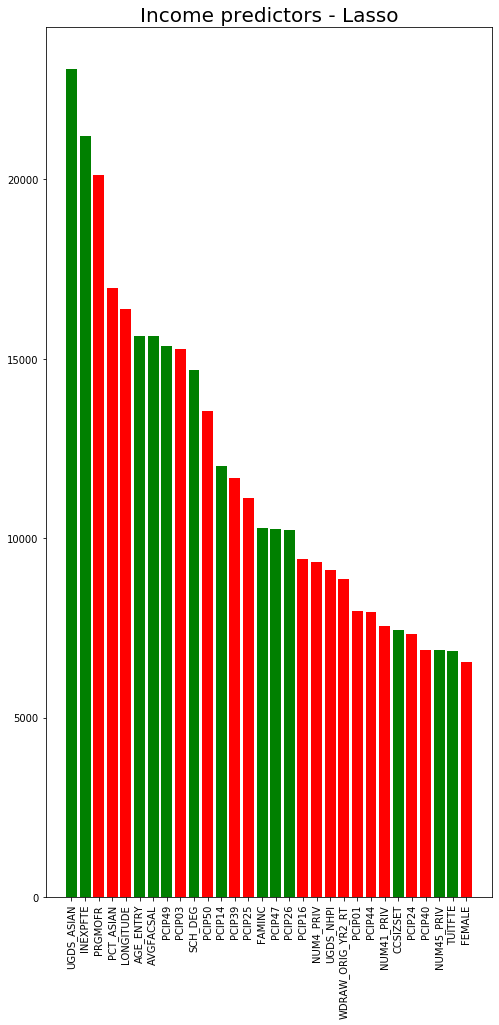

In [572]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors - Lasso")
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)

plt.show()
fig.savefig(path2 + 'lasso_income_predictor.png', format = 'png' , bbox_inches='tight')

In [573]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.281549,title_iv.withdrawn_by.2yrs,126 Percent withdrawn from original institu...,"126 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.148300,demographics.race_ethnicity.asian,408 Total share of enrollment of undergradu...,"408 student Name: dev-category, dtype: object"
2,PCIP51,0.079352,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
3,TUITFTE,0.071374,tuition_revenue_per_fte,358 Net tuition revenue per full-time equiv...,"358 school Name: dev-category, dtype: object"
4,FAMINC,0.049890,demographics.avg_family_income,373 Average family income in real 2015 doll...,"373 student Name: dev-category, dtype: object"
5,AGE_ENTRY,0.049392,demographics.age_entry,371 Average age of entry Name: NAME OF DATA...,"371 student Name: dev-category, dtype: object"
6,PCIP14,0.048269,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
7,PCIP52,0.037408,program_percentage.business_marketing,61 Percentage of degrees awarded in Busines...,"61 academics Name: dev-category, dtype: object"
8,C150_4,0.034805,completion_rate_4yr_150nt,"123 Completion rate for first-time, full-ti...","123 completion Name: dev-category, dtype: o..."
9,LOAN_EVER,0.031421,students_with_any_loan,122 Share of students who received a federa...,"122 aid Name: dev-category, dtype: object"


In [ ]:
#now lets do the elastic net model

In [574]:
X = X_base_line
y = y_baseline

In [575]:
#not supposed to be here.  Should have been dropped.  All RPY column values
#X['IND_RPY_1YR_RT']


In [576]:
columns = X.columns.to_list()

In [577]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [578]:
y_train_nat = y_train

In [579]:
y_train = y_train.ravel().reshape(1,-1)

In [580]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [ ]:
y_test = y_test.ravel().reshape(1,-1)
y_test

In [582]:
X_train = X_scaler.transform(X_train)
#y_train =  y_scaler.transform(y_train)
X_test =  X_scaler.transform(X_test)
#y_test = y_scaler.transform(y_test)

In [583]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.05,l1_ratio = .4,  max_iter = 10000, tol = .1)

In [584]:
elastic_net = model.fit(X_train, y_train.ravel())
elastic_net  = model.score(X_test, y_test)
elastic_net

0.7026508252544759

In [585]:
alpha = [0.01, .05, .1, .15, .2, .4, .6, .8, 1]
l1_ratio = [0, .2, .4, .6, .8, 1]
# Maximum number of levels in tree
fit_intercept = [True, False]
normalize = [True, False]
warm_start = [True, False]
selection = ['cyclic', 'random']
random_state = [10]

random_grid = {'alpha': alpha,
               'l1_ratio': l1_ratio,
               'fit_intercept' : fit_intercept,
               'normalize': normalize,
               'warm_start': warm_start,
               'selection': selection,
               'random_state': random_state}
random_grid

{'alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1],
 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
 'fit_intercept': [True, False],
 'normalize': [True, False],
 'warm_start': [True, False],
 'selection': ['cyclic', 'random'],
 'random_state': [10]}

In [586]:
elastic_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [587]:
elastic_random.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 395 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 477 out of 500 | elapsed:   21.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   30.4s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [588]:
predicted_y = elastic_random.predict(X_test)

In [589]:
elastic_random.score(X_test, y_test)

0.8028026670377391

In [590]:
elastic_random

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [591]:
elastic_random.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [592]:
model_best =elastic_random.best_estimator_

In [593]:
model_best.fit(X_train, y_train.ravel())


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [594]:
model_best.coef_

array([ 7.30089324e+03,  1.38276257e+03,  1.78425817e+03,  0.00000000e+00,
       -5.72120933e+02, -1.28014003e+03, -5.95826755e+02, -1.70125652e+03,
        0.00000000e+00,  3.17247689e+03, -4.56096573e+03, -2.30873547e+03,
        5.27157903e+02,  4.07938558e+03,  3.08735695e+03, -3.41203665e+03,
        1.28839777e+03, -2.72741243e+03, -9.74541017e+02, -1.71265558e+03,
        2.17970183e+03,  7.35357499e+02,  1.40434137e+02, -1.35769321e+02,
       -1.39455968e+03,  1.40784778e+03, -3.26155424e+00,  3.65033185e+03,
       -2.00171878e+01,  1.65422595e+03, -3.34812699e+03,  2.49372101e+03,
       -9.05720418e+02,  1.49156787e+02, -1.50534629e+02,  1.18166711e+03,
       -1.08117357e+03,  3.12417772e+02,  8.66865390e+00, -4.59633270e+02,
       -6.84347341e+02, -2.23941049e+03, -6.43062377e+03,  9.59049897e+02,
       -1.44163133e+03, -2.25693217e+03,  3.04797585e+03,  3.50197410e+03,
       -2.00625199e+02, -2.49416351e+03,  1.11530482e+04,  2.11735068e+03,
       -5.06346286e+03,  

In [595]:
columns = X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [596]:
elasticnet_results = {'columns': columns, 'coefficient': model_best.coef_}

In [597]:
elasticnet_results_df = pd.DataFrame(data = elasticnet_results)

In [598]:
elasticnet_results_df['abs(coef_)'] = np.abs(elasticnet_results_df['coefficient'])

In [599]:
number_of_features = 30
elasticnet_results_df = elasticnet_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False).head(number_of_features)

In [600]:
elasticnet_results_df

,columns,coefficient,abs(coef_)
211,AVGFACSAL,15073.369110,15073.369110
123,UGDS_ASIAN,13455.064416,13455.064416
210,INEXPFTE,12218.961362,12218.961362
50,PCIP14,11153.048159,11153.048159
217,WDRAW_ORIG_YR2_RT,-10117.108257,10117.108257
75,PCIP50,-9364.598622,9364.598622
232,FAMINC,8460.042868,8460.042868
224,AGE_ENTRY,7806.522139,7806.522139
175,NPT4_75UP_PRIV,7458.529856,7458.529856
74,PCIP49,7356.186353,7356.186353


In [601]:
mask = elasticnet_results_df['coefficient'] > 0

In [602]:
x = elasticnet_results_df['columns']
y = elasticnet_results_df['abs(coef_)']

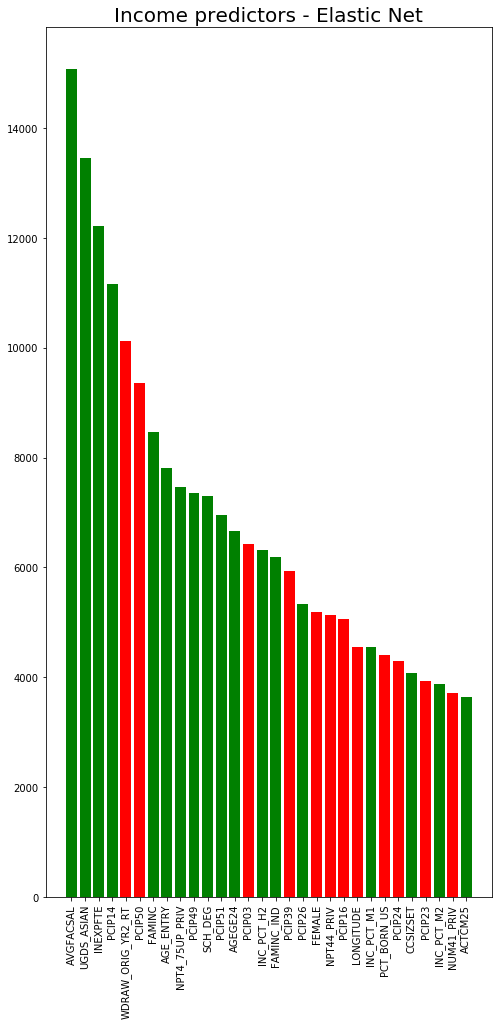

In [603]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors - Elastic Net")
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)

plt.show()
fig.savefig(path2 + 'elastic_net_income_predictor.png', format = 'png' , bbox_inches='tight')